<a href="https://colab.research.google.com/github/VeenaShirsath/COMPSCI590/blob/main/COMPSCI590_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries and settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import NearestNeighbors

from numpy import mean
from numpy import var
from math import sqrt

sns.set()

pd.set_option('display.max_columns', None)

Importing the dataset, understanding the data

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
communities_and_crime_unnormalized = fetch_ucirepo(id=211)

# data (as pandas dataframes)
X = communities_and_crime_unnormalized.data.features
y = communities_and_crime_unnormalized.data.targets

# metadata
print(communities_and_crime_unnormalized.metadata)

# variable information
print(communities_and_crime_unnormalized.variables)


{'uci_id': 211, 'name': 'Communities and Crime Unnormalized', 'repository_url': 'https://archive.ics.uci.edu/dataset/211/communities+and+crime+unnormalized', 'data_url': 'https://archive.ics.uci.edu/static/public/211/data.csv', 'abstract': "Communities in the US. Data combines socio-economic data from the '90 Census, law enforcement data from the 1990 Law Enforcement Management and Admin Stats survey, and crime data from the 1995 FBI UCR", 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 2215, 'num_features': 125, 'feature_types': ['Real'], 'demographics': ['Race', 'Age', 'Income', 'Education Level', 'Other', 'Occupation'], 'target_col': ['murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop', 'assaults', 'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'violentPerPop', 'nonViolPerPop'], 'index_col': ['communityname', 'countyCode

In [ ]:
X

,State,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,persUrban,pctUrban,medIncome,pctWwage,pctWfarm,pctWdiv,pctWsocsec,pctPubAsst,pctRetire,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,otherPerCap,hispPerCap,persPoverty,pctPoverty,pctLowEdu,pctNotHSgrad,pctCollGrad,pctUnemploy,pctEmploy,pctEmployMfg,pctEmployProfServ,pctOccupManu,pctOccupMgmt,pctMaleDivorc,pctMaleNevMar,pctFemDivorc,pctAllDivorc,persPerFam,pct2Par,pctKids2Par,pctKids-4w2Par,pct12-17w2Par,pctWorkMom-6,pctWorkMom-18,kidsBornNevrMarr,pctKidsBornNevrMarr,numForeignBorn,pctFgnImmig-3,pctFgnImmig-5,pctFgnImmig-8,pctFgnImmig-10,pctImmig-3,pctImmig-5,pctImmig-8,pctImmig-10,pctSpeakOnlyEng,pctNotSpeakEng,pctLargHousFam,pctLargHous,persPerOccupHous,persPerOwnOccup,persPerRenterOccup,pctPersOwnOccup,pctPopDenseHous,pctSmallHousUnits,medNumBedrm,houseVacant,pctHousOccup,pctHousOwnerOccup,pctVacantBoarded,pctVacant6up,medYrHousBuilt,pctHousWOphone,pctHousWOplumb,ownHousLowQ,ownHousMed,ownHousUperQ,ownHousQrange,rentLowQ,rentMed,rentUpperQ,rentQrange,medGrossRent,medRentpctHousInc,medOwnCostpct,medOwnCostPctWO,persEmergShelt,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,numPolice,policePerPop,policeField,policeFieldPerPop,policeCalls,policCallPerPop,policCallPerOffic,policePerPop2,racialMatch,pctPolicWhite,pctPolicBlack,pctPolicHisp,pctPolicAsian,pctPolicMinority,officDrugUnits,numDiffDrugsSeiz,policAveOT,landArea,popDensity,pctUsePubTrans,policCarsAvail,policOperBudget,pctPolicPatrol,gangUnit,pctOfficDrugUnit,policBudgetPerPop
0,NJ,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.00,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,1845.9,9.63,NaN,NaN,NaN,NaN,0.0,NaN
1,PA,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.00,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2186.7,3.84,NaN,NaN,NaN,NaN,0.0,NaN
2,OR,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.00,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2780.9,4.37,NaN,NaN,NaN,NaN,0.0,NaN
3,NY,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,0,0.00,20580,68.15,0.24,38.95,39.48,11.71,18.33,26501,10810,10909,9984,4941,3541,2451.0,4391,2831,17.23,11.05,33.68,10.81,9.86,54.74,31.22,27.43,26.76,22.71,10.98,28.15,14.47,12.91,2.98,64.02,62.36,65.38,67.43,59.59,70.27,561,3.84,339,13.86,13.86,15.34,15.34,0.28,0.28,0.31,0.31,94.98,0.56,3.93,2.56,2.37,2.51,2.20,58.18,1.21,45.66,3,669,91.19,54.89,2.54,57.85,1939,7.00,0.87,36400,49600,66500,30100,19

In [ ]:
y

,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
0,0,0.00,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,0,0.00,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,3,8.30,6.0,16.60,56.0,154.95,14.0,38.74,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,0,0.00,10.0,57.86,10.0,57.86,33.0,190.93,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,0,0.00,NaN,NaN,4.0,32.04,14.0,112.14,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,10,16.49,30.0,49.46,121.0,199.50,170.0,280.29,1376.0,2268.72,2563.0,4225.82,489.0,806.25,34.0,56.06,545.75,7356.84
2211,0,0.00,4.0,33.09,1.0,8.27,10.0,82.73,104.0,860.43,574.0,4748.90,24.0,198.56,2.0,16.55,124.10,5824.44
2212,5,13.61,5.0,13.61,24.0,65.32,96.0,261.29,628.0,1709.26,895.0,2435.97,179.0,487.19,8.0,21.77,353.83,4654.20
2213,0,0.00,2.0,15.71,7.0,54.98,79.0,620.48,192.0,1508.01,474.0,3722.90,13.0,102.10,1.0,7.85,691.17,5340.87


In [ ]:
df = pd.concat([X, y], axis=1)

In [ ]:
df

,State,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,persUrban,pctUrban,medIncome,pctWwage,pctWfarm,pctWdiv,pctWsocsec,pctPubAsst,pctRetire,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,otherPerCap,hispPerCap,persPoverty,pctPoverty,pctLowEdu,pctNotHSgrad,pctCollGrad,pctUnemploy,pctEmploy,pctEmployMfg,pctEmployProfServ,pctOccupManu,pctOccupMgmt,pctMaleDivorc,pctMaleNevMar,pctFemDivorc,pctAllDivorc,persPerFam,pct2Par,pctKids2Par,pctKids-4w2Par,pct12-17w2Par,pctWorkMom-6,pctWorkMom-18,kidsBornNevrMarr,pctKidsBornNevrMarr,numForeignBorn,pctFgnImmig-3,pctFgnImmig-5,pctFgnImmig-8,pctFgnImmig-10,pctImmig-3,pctImmig-5,pctImmig-8,pctImmig-10,pctSpeakOnlyEng,pctNotSpeakEng,pctLargHousFam,pctLargHous,persPerOccupHous,persPerOwnOccup,persPerRenterOccup,pctPersOwnOccup,pctPopDenseHous,pctSmallHousUnits,medNumBedrm,houseVacant,pctHousOccup,pctHousOwnerOccup,pctVacantBoarded,pctVacant6up,medYrHousBuilt,pctHousWOphone,pctHousWOplumb,ownHousLowQ,ownHousMed,ownHousUperQ,ownHousQrange,rentLowQ,rentMed,rentUpperQ,rentQrange,medGrossRent,medRentpctHousInc,medOwnCostpct,medOwnCostPctWO,persEmergShelt,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,numPolice,policePerPop,policeField,policeFieldPerPop,policeCalls,policCallPerPop,policCallPerOffic,policePerPop2,racialMatch,pctPolicWhite,pctPolicBlack,pctPolicHisp,pctPolicAsian,pctPolicMinority,officDrugUnits,numDiffDrugsSeiz,policAveOT,landArea,popDensity,pctUsePubTrans,policCarsAvail,policOperBudget,pctPolicPatrol,gangUnit,pctOfficDrugUnit,policBudgetPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
0,NJ,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.00,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,1845.9,9.63,NaN,NaN,NaN,NaN,0.0,NaN,0,0.00,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,PA,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.00,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2186.7,3.84,NaN,NaN,NaN,NaN,0.0,NaN,0,0.00,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,OR,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.00,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2780.9,4.37,NaN,NaN,NaN,NaN,0.0,NaN,3,8.30,6.0,16.60,56.0,154.95,14.0,38.74,274.0,758.14,1797.0,4972.1

Setting the Treatment variable
  * current threshold for percentage of Black population is 30%
  * The histogram below shows the distribution of Blacks across different communiites. We take the threshold from this plot.

Bin Edges: [ 0.     9.667 19.334 29.001 38.668 48.335 58.002 67.669 77.336 87.003
 96.67 ]
Bin Counts: [1613.  243.  134.   88.   67.   35.   20.    7.    3.    5.]


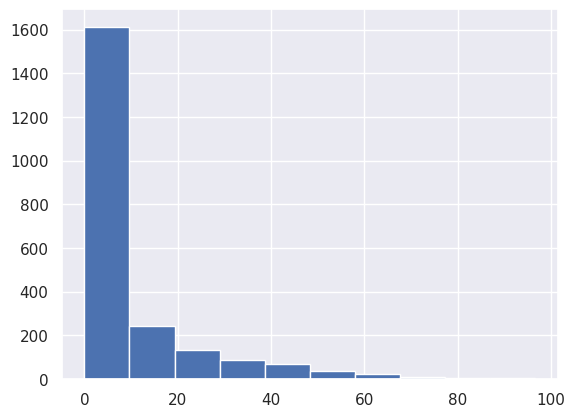

In [ ]:
counts, bins, patches = plt.hist(df['pctBlack'])

# Print the bin edges
print("Bin Edges:", bins)

# Print the bin counts
print("Bin Counts:", counts)

plt.show()

In [ ]:
## creating treatment variable
def treat(row):
    if row['pctBlack'] > 20:
        val = 0
    else:
        val = 1
    return val

df['treatment'] = df.apply(treat, axis=1)

In [ ]:
df

,State,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,persUrban,pctUrban,medIncome,pctWwage,pctWfarm,pctWdiv,pctWsocsec,pctPubAsst,pctRetire,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,otherPerCap,hispPerCap,persPoverty,pctPoverty,pctLowEdu,pctNotHSgrad,pctCollGrad,pctUnemploy,pctEmploy,pctEmployMfg,pctEmployProfServ,pctOccupManu,pctOccupMgmt,pctMaleDivorc,pctMaleNevMar,pctFemDivorc,pctAllDivorc,persPerFam,pct2Par,pctKids2Par,pctKids-4w2Par,pct12-17w2Par,pctWorkMom-6,pctWorkMom-18,kidsBornNevrMarr,pctKidsBornNevrMarr,numForeignBorn,pctFgnImmig-3,pctFgnImmig-5,pctFgnImmig-8,pctFgnImmig-10,pctImmig-3,pctImmig-5,pctImmig-8,pctImmig-10,pctSpeakOnlyEng,pctNotSpeakEng,pctLargHousFam,pctLargHous,persPerOccupHous,persPerOwnOccup,persPerRenterOccup,pctPersOwnOccup,pctPopDenseHous,pctSmallHousUnits,medNumBedrm,houseVacant,pctHousOccup,pctHousOwnerOccup,pctVacantBoarded,pctVacant6up,medYrHousBuilt,pctHousWOphone,pctHousWOplumb,ownHousLowQ,ownHousMed,ownHousUperQ,ownHousQrange,rentLowQ,rentMed,rentUpperQ,rentQrange,medGrossRent,medRentpctHousInc,medOwnCostpct,medOwnCostPctWO,persEmergShelt,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,numPolice,policePerPop,policeField,policeFieldPerPop,policeCalls,policCallPerPop,policCallPerOffic,policePerPop2,racialMatch,pctPolicWhite,pctPolicBlack,pctPolicHisp,pctPolicAsian,pctPolicMinority,officDrugUnits,numDiffDrugsSeiz,policAveOT,landArea,popDensity,pctUsePubTrans,policCarsAvail,policOperBudget,pctPolicPatrol,gangUnit,pctOfficDrugUnit,policBudgetPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop,treatment
0,NJ,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.00,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,1845.9,9.63,NaN,NaN,NaN,NaN,0.0,NaN,0,0.00,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59,1
1,PA,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.00,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2186.7,3.84,NaN,NaN,NaN,NaN,0.0,NaN,0,0.00,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95,1
2,OR,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.00,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2780.9,4.37,NaN,NaN,NaN,NaN,0.0,NaN,3,8.30,6.0,16.60,56.0,154.95,14.0,38.74,274.0,758.14

Data processing

In [ ]:
null_cols = df.columns[df.isna().any()].tolist()

In [ ]:
df[null_cols].isnull().sum()

,0
otherPerCap,1
numPolice,1872
policePerPop,1872
policeField,1872
policeFieldPerPop,1872
policeCalls,1872
policCallPerPop,1872
policCallPerOffic,1872
policePerPop2,1872
racialMatch,1872


In [ ]:
states = df[(df['State'] == "MN") | (df['State'] == "IL") | (df['State'] == "MI")]

states[null_cols].isnull().sum()

,0
otherPerCap,0
numPolice,195
policePerPop,195
policeField,195
policeFieldPerPop,195
policeCalls,195
policCallPerPop,195
policCallPerOffic,195
policePerPop2,195
racialMatch,195


We are removing columns related to police dept (LEMAS survey) since that data is scarce. Also removing 3 states: MI, MN, IL because they are responsbile for missing data relating to rape crimes.

In [ ]:
index_to_drop = df[(df['State'] == "MN") | (df['State'] == "IL") | (df['State'] == "MI")].index
df_new = df.drop(index_to_drop)

In [ ]:
print(df_new.columns.tolist())

['State', 'pop', 'perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'persUrban', 'pctUrban', 'medIncome', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'medFamIncome', 'perCapInc', 'whitePerCap', 'blackPerCap', 'NAperCap', 'asianPerCap', 'otherPerCap', 'hispPerCap', 'persPoverty', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'numForeignBorn', 'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous', 'persPerOccupHous', 'persPerOwnOccup', 'persPer

In [ ]:
df_final = df_new.drop(['numPolice', 'policePerPop', 'policeField', 'policeFieldPerPop', 'policeCalls', 'policCallPerPop', 'policCallPerOffic', 'policePerPop2', 'racialMatch',
                       'pctPolicWhite', 'pctPolicBlack', 'pctPolicHisp', 'pctPolicAsian', 'pctPolicMinority', 'officDrugUnits', 'numDiffDrugsSeiz', 'policAveOT', 'landArea',
                       'popDensity', 'pctUsePubTrans', 'policCarsAvail', 'policOperBudget', 'pctPolicPatrol', 'gangUnit', 'pctOfficDrugUnit', 'policBudgetPerPop'], axis=1)

In [ ]:
df_final

,State,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,persUrban,pctUrban,medIncome,pctWwage,pctWfarm,pctWdiv,pctWsocsec,pctPubAsst,pctRetire,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,otherPerCap,hispPerCap,persPoverty,pctPoverty,pctLowEdu,pctNotHSgrad,pctCollGrad,pctUnemploy,pctEmploy,pctEmployMfg,pctEmployProfServ,pctOccupManu,pctOccupMgmt,pctMaleDivorc,pctMaleNevMar,pctFemDivorc,pctAllDivorc,persPerFam,pct2Par,pctKids2Par,pctKids-4w2Par,pct12-17w2Par,pctWorkMom-6,pctWorkMom-18,kidsBornNevrMarr,pctKidsBornNevrMarr,numForeignBorn,pctFgnImmig-3,pctFgnImmig-5,pctFgnImmig-8,pctFgnImmig-10,pctImmig-3,pctImmig-5,pctImmig-8,pctImmig-10,pctSpeakOnlyEng,pctNotSpeakEng,pctLargHousFam,pctLargHous,persPerOccupHous,persPerOwnOccup,persPerRenterOccup,pctPersOwnOccup,pctPopDenseHous,pctSmallHousUnits,medNumBedrm,houseVacant,pctHousOccup,pctHousOwnerOccup,pctVacantBoarded,pctVacant6up,medYrHousBuilt,pctHousWOphone,pctHousWOplumb,ownHousLowQ,ownHousMed,ownHousUperQ,ownHousQrange,rentLowQ,rentMed,rentUpperQ,rentQrange,medGrossRent,medRentpctHousInc,medOwnCostpct,medOwnCostPctWO,persEmergShelt,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop,treatment
0,NJ,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.00,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,0,0.00,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59,1
1,PA,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.00,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,0,0.00,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95,1
2,OR,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.00,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,3,8.30,6.0,16.60,56.0,154.95,14.0,38.74,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51,1
3,NY,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,0,0.00,20580,68.15,0.24,38.95,39.48,11.71,18.33,26501,10810,10909,9984,4941,3541,2451.0,4391,2831,17.23,11.05,33.68,10.81,9.86,54.74,31.22,27.43,26.76,22.71,10.98,28.15,14.47,12.91,2.98,64.02,62.36,65.38,67.43,59.59,70.27,561,3.84,339,13.86,13.86,15.34,15.34,0.28,0.28,0.31,0.31,94.98,0.56,3.93,2.56,2.37,2.51,2.20,58.18,1.21,45.66,3,669,91.19,54.89,2.54,57.85,1939,7.00,0.87,36400,49600,66500,30100,195,250,309,114,333,28.7,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24,0,0.00,10.0,57.86,10.0,57.86,33.0,190.93,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN,1
5,M

In [ ]:
null_cols_1 = df_final.columns[df_final.isna().any()].tolist()

In [ ]:
df_final[null_cols_1].isnull().sum()

,0
otherPerCap,1
rapes,1
rapesPerPop,1
robberies,1
robbbPerPop,1
assaults,13
assaultPerPop,13
burglaries,3
burglPerPop,3
larcenies,3


In [ ]:
#df_final[df_final['arsons'].isnull()]

null_count = df_final.groupby('State')['arsons'].apply(lambda x: x.isnull().sum()).reset_index(name='null_count')

print(null_count)

   State  null_count
0     AK           0
1     AL          27
2     AR           0
3     AZ           0
4     CA           0
5     CO           0
6     CT           0
7     DC           0
8     DE           0
9     FL           0
10    GA           0
11    IA          17
12    ID           0
13    IN           0
14    KS           1
15    KY           0
16    LA           3
17    MA           5
18    MD           3
19    ME           0
20    MO           0
21    MS           0
22    NC           0
23    ND           0
24    NH           0
25    NJ           0
26    NM           0
27    NV           1
28    NY          17
29    OH           3
30    OK           0
31    OR           0
32    PA           1
33    RI           0
34    SC           0
35    SD           1
36    TN           2
37    TX           1
38    UT           0
39    VA           0
40    VT           4
41    WA           1
42    WI           1
43    WV           0
44    WY           0


In [ ]:
## State column needs to be encoded since it is a text column
df_final['State'] = df_final['State'].astype('category')

df_encoded = pd.get_dummies(df_final, columns=['State', ])

In [ ]:
columns_to_convert = ['State_AK','State_AL','State_AR','State_AZ','State_CA','State_CO','State_CT','State_DC','State_DE','State_FL','State_GA','State_IA','State_ID','State_IN',
                      'State_KS','State_KY','State_LA','State_MA','State_MD','State_ME','State_MO','State_MS','State_NC','State_ND','State_NH','State_NJ','State_NM','State_NV',
                      'State_NY','State_OH','State_OK','State_OR','State_PA','State_RI','State_SC','State_SD','State_TN','State_TX','State_UT','State_VA','State_VT','State_WA',
                      'State_WI','State_WV','State_WY']
df_encoded[columns_to_convert] = df_encoded[columns_to_convert].astype(int)

In [ ]:
df_encoded

,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,persUrban,pctUrban,medIncome,pctWwage,pctWfarm,pctWdiv,pctWsocsec,pctPubAsst,pctRetire,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,otherPerCap,hispPerCap,persPoverty,pctPoverty,pctLowEdu,pctNotHSgrad,pctCollGrad,pctUnemploy,pctEmploy,pctEmployMfg,pctEmployProfServ,pctOccupManu,pctOccupMgmt,pctMaleDivorc,pctMaleNevMar,pctFemDivorc,pctAllDivorc,persPerFam,pct2Par,pctKids2Par,pctKids-4w2Par,pct12-17w2Par,pctWorkMom-6,pctWorkMom-18,kidsBornNevrMarr,pctKidsBornNevrMarr,numForeignBorn,pctFgnImmig-3,pctFgnImmig-5,pctFgnImmig-8,pctFgnImmig-10,pctImmig-3,pctImmig-5,pctImmig-8,pctImmig-10,pctSpeakOnlyEng,pctNotSpeakEng,pctLargHousFam,pctLargHous,persPerOccupHous,persPerOwnOccup,persPerRenterOccup,pctPersOwnOccup,pctPopDenseHous,pctSmallHousUnits,medNumBedrm,houseVacant,pctHousOccup,pctHousOwnerOccup,pctVacantBoarded,pctVacant6up,medYrHousBuilt,pctHousWOphone,pctHousWOplumb,ownHousLowQ,ownHousMed,ownHousUperQ,ownHousQrange,rentLowQ,rentMed,rentUpperQ,rentQrange,medGrossRent,medRentpctHousInc,medOwnCostpct,medOwnCostPctWO,persEmergShelt,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop,treatment,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_ID,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MO,State_MS,State_NC,State_ND,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.00,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,0,0.00,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.00,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,0,0.00,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.00,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,3,8.30,6.0,16.60,56.0,154.95,14.0,38.74,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

removing the rest of the NaN values by imputing using the mean of the column

In [ ]:
df_filled_mean = df_encoded.fillna(df_encoded.mean())

In [ ]:
df_final = df_filled_mean.copy()

Preparing data for Matching

In [ ]:
cols_matching = ['pop',	'perHoush','pctBlack','pctWhite','pctAsian','pctHisp','pct12-21','pct12-29','pct16-24','pct65up','persUrban','pctUrban','medIncome','pctWwage','pctWfarm',
                 'pctWdiv','pctWsocsec','pctPubAsst','pctRetire','medFamIncome','perCapInc','whitePerCap','blackPerCap','NAperCap','asianPerCap','otherPerCap','hispPerCap',
                 'persPoverty','pctPoverty','pctLowEdu','pctNotHSgrad','pctCollGrad','pctUnemploy','pctEmploy','pctEmployMfg','pctEmployProfServ','pctOccupManu','pctOccupMgmt',
                 'pctMaleDivorc','pctMaleNevMar','pctFemDivorc','pctAllDivorc','persPerFam','pct2Par','pctKids2Par','pctKids-4w2Par','pct12-17w2Par','pctWorkMom-6','pctWorkMom-18',
                 'kidsBornNevrMarr','pctKidsBornNevrMarr','numForeignBorn','pctFgnImmig-3','pctFgnImmig-5','pctFgnImmig-8','pctFgnImmig-10','pctImmig-3','pctImmig-5','pctImmig-8',
                 'pctImmig-10','pctSpeakOnlyEng','pctNotSpeakEng','pctLargHousFam','pctLargHous','persPerOccupHous','persPerOwnOccup','persPerRenterOccup','pctPersOwnOccup',
                 'pctPopDenseHous','pctSmallHousUnits','medNumBedrm','houseVacant','pctHousOccup','pctHousOwnerOccup','pctVacantBoarded','pctVacant6up','medYrHousBuilt',
                 'pctHousWOphone','pctHousWOplumb','ownHousLowQ','ownHousMed','ownHousUperQ','ownHousQrange','rentLowQ','rentMed','rentUpperQ','rentQrange','medGrossRent',
                 'medRentpctHousInc','medOwnCostpct','medOwnCostPctWO','persEmergShelt','persHomeless','pctForeignBorn','pctBornStateResid','pctSameHouse-5','pctSameCounty-5',
                 'pctSameState-5','murders','murdPerPop','rapes','rapesPerPop','robberies','robbbPerPop','assaults','assaultPerPop','burglaries','burglPerPop','larcenies',
                 'larcPerPop','autoTheft','autoTheftPerPop','arsons','arsonsPerPop','violentPerPop','nonViolPerPop',
                 'State_AK','State_AL','State_AR','State_AZ','State_CA','State_CO','State_CT','State_DC','State_DE','State_FL','State_GA','State_IA','State_ID','State_IN',
                 'State_KS','State_KY','State_LA','State_MA','State_MD','State_ME','State_MO','State_MS','State_NC','State_ND','State_NH','State_NJ','State_NM','State_NV',
                 'State_NY','State_OH','State_OK','State_OR','State_PA','State_RI','State_SC','State_SD','State_TN','State_TX','State_UT','State_VA','State_VT','State_WA',
                 'State_WI','State_WV','State_WY',
                 'treatment']

In [ ]:
matching_df = df_final[cols_matching]

In [ ]:
matching_df = matching_df.reset_index()

Creating Synthetic data: intial method
to get a ground truth ATE to compare other methods with

In [ ]:
np.random.seed(42)

In [ ]:
# Simulate treatment assignment (50% treatment)
treatment = np.random.choice([0, 1], size=len(matching_df), p=[0.5, 0.5])
matching_df['synth_treatment'] = treatment

In [ ]:
#Simulate True ATE (Constant Treatment Effect of 5), Control units' outcomes remain unchanged.
treatment_effect = 5

matching_df['murders_simulated'] = matching_df['murders'] + treatment * treatment_effect

the true ATE in this synthetic dataset is 5 because all treated units have their outcomes increased by 5, and control units’ outcomes remain unchanged.

In [ ]:
# Let's say higher income results in higher treatment effect
matching_df['treatment_effect'] = 5 * (1 + matching_df['medIncome'] / matching_df['medIncome'].max())  # Example scaling

# Apply the CATE
matching_df['murders_simulated_cate'] = matching_df['murders'] + treatment * matching_df['treatment_effect']

In this case, the true CATE varies depending on the value of income. Higher values of crime_rate will result in a higher treatment effect for those units.

In [ ]:
# Adding some noise to outcomes (Gaussian noise)
noise = np.random.normal(0, 1, size=len(matching_df))
matching_df['murders_simulated_cate'] += noise

## Data Generating Process

In [2]:
def expit(x):
    '''
    The expit function, also known as the logistic function, is defined as expit(x) = 1 / (1 + exp(-x))
    Parameters:
    x (float): A scalar value
    Returns:
    float: The value of the expit function at x
    '''
    return 1 / (1 + np.exp(-x))
def sample_X(n, p):
    '''
    Generates a sample of size `n` from a Uniform distribution with bounds [0,1]
    Parameters:
    n (int): The number of trials or sample size.
    p (float): The number of features
    Returns:
    numpy.ndarray: A n by p matrix
    '''
    return np.random.uniform(-1, 1, (n, p))

def make_pi(X):
    '''
    Given a (n by p) dimensional matrix X, construct the propensity score function, P(T = 1 | X = x), for each unit (row) in X
    Parameters:
    X (numpy.ndarray): A n by p matrix
    Returns:
    numpy.ndarray: A n by 1 matrix
    '''
    return expit(0.5 * X[:, 0] + 0.5 * X[:, 1])

def sample_T(X, pi_function = make_pi):
    '''
    Given a (n by p) dimensional matrix X, sample the treatment indicator T for each unit in X
    Parameters:
    X (numpy.ndarray): A n by p matrix
    pi_function (function): A function that takes in a (n by p) dimensional matrix X and returns a (n by 1) dimensional matrix
    Returns:
    numpy.ndarray: A n by 1 matrix
    '''
    return np.random.binomial(1, pi_function(X))

def mu(X, T):
    '''
    Given a (n by p) dimensional matrix X and a (n by 1) dimensional matrix T, compute the conditional mean E[Y | X = x, T = t] for each unit in X
    Parameters:
    X (numpy.ndarray): A n by p matrix
    T (numpy.ndarray): A n by 1 matrix
    Returns:
    numpy.ndarray: A n by 1 matrix
    '''
    return 10 + X[:, 0] + 2 * X[:, 1] + 10 * T + 10 * X[:, 1]**2 * T

def sample_Y(X, T):
    '''
    Given a (n by p) dimensional matrix X and a (n by 1) dimensional matrix T, sample the response Y for each unit in X
    Parameters:
    X (numpy.ndarray): A n by p matrix
    T (numpy.ndarray): A n by 1 matrix
    Returns:
    numpy.ndarray: A n by 1 matrix
    '''
    error = np.random.normal(0, 1, X.shape[0])
    return mu(X, T) + error

In [3]:
### Solution if answering via simulation

n = 1000
p = 150

X = sample_X(n, p) # Generate features X
T = sample_T(X) # Generate treatment T
Y = sample_Y(X, T) # Generate outcome Y based on X and T

# Compute the potential outcomes
Y_1 = mu(X, T=1)
Y_0 = mu(X, T=0)

ground_truth_ate =  np.mean(Y_1 - Y_0)
print("Ground-truth ATE:", ground_truth_ate)

Ground-truth ATE: 13.334328702588945


In [4]:
dataset = np.column_stack((X, T, Y))

# Generate column names for X1 to X150
x_columns = [f'X{i+1}' for i in range(X.shape[1])]

# Combine with T and Y
columns = x_columns + ['T', 'Y']

# Create DataFrame
df = pd.DataFrame(dataset, columns=columns)
print(df.head())

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.672682 -0.580003  0.100007 -0.679543  0.930975 -0.856775 -0.112736   
1 -0.724130  0.624922  0.384217  0.533127  0.390796  0.265128 -0.328948   
2 -0.412154  0.689077  0.714954 -0.833778  0.426920 -0.009049 -0.039546   
3  0.932442 -0.181134  0.265039  0.753363 -0.439230  0.152814  0.233069   
4 -0.391318 -0.732900 -0.094207  0.084717 -0.446443 -0.575823 -0.401254   

         X8        X9       X10       X11       X12       X13       X14  \
0  0.685143 -0.510442 -0.872729  0.488500  0.913007  0.953871 -0.787760   
1 -0.900083  0.561749 -0.962376 -0.653934  0.657672  0.111072 -0.982030   
2 -0.785124  0.352273 -0.388133 -0.366024  0.041395 -0.014625  0.632180   
3  0.911435 -0.062241  0.271768  0.026998 -0.684882  0.140561 -0.618901   
4  0.033380  0.181369 -0.931737  0.062088 -0.125310 -0.394198 -0.521698   

        X15       X16       X17       X18       X19       X20       X21  \
0  0.253780 -0.453502 -

In [ ]:
df.dtypes

,0
X1,float64
X2,float64
X3,float64
X4,float64
X5,float64
...,...
X148,float64
X149,float64
X150,float64
T,float64


## Matching methods

### V: Propensity score
Source code: https://www.kaggle.com/code/harrywang/propensity-score-matching-in-python

Not a stable library: https://pypi.org/project/psmpy/#predict-scores

Another source: https://towardsdatascience.com/causal-inference-with-python-a-guide-to-propensity-score-matching-b3470080c84f/



In [ ]:
df.groupby('T').mean()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,Y
T,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,-0.084112,-0.068341,-0.006554,0.027782,0.009078,-0.025016,-0.039291,0.020611,-0.036235,0.017097,0.020540,-0.007665,0.018431,0.048378,0.022838,0.037799,-0.001548,-0.002102,-0.022585,0.004808,-0.020644,-0.030850,-0.022020,0.016254,0.015743,-0.009802,-0.020974,0.044819,-0.024571,0.033128,-0.006021,-0.003902,0.024782,0.016529,0.027515,0.016515,-0.004456,0.000709,-0.046778,-0.008979,0.018703,0.024807,-0.003975,0.006406,-0.047529,-0.005804,-0.034144,-0.031305,-0.028609,-0.032973,0.009187,-0.067343,0.020988,-0.012575,-0.048301,0.003373,0.011472,-0.031388,-0.004134,0.00835,-0.011492,0.005194,0.013899,-0.020864,-0.019586,-0.004866,0.013206,-0.050447,0.02181,0.007500,0.034806,-0.037866,0.003799,0.017155,-0.038442,0.019839,-0.009781,0.0271,0.008915,0.045985,-0.006541,0.02844,-0.029994,0.009602,-0.020595,-0.020947,0.013839,-0.000335,-0.032418,0.023415,-0.039046,0.012627,-0.032339,-0.022042,-0.031051,0.017710,-0.019941,-0.021023,-0.021619,-0.000220,0.011131,-0.047063,-0.033507,0.009577,0.027105,0.029022,0.019024,-0.006835,-0.018142,0.040272,0.043553,-0.000158,0.040127,0.015979,0.043662,-0.020319,0.020575,-0.003993,-0.002795,-0.013756,0.033346,0.002953,0.062096,0.015305,0.001121,0.010217,-0.023179,0.000909,-0.034102,-0.014086,-0.001742,0.026206,0.013066,0.002502,-0.019557,0.008375,0.024160,-0.021944,0.024634,-0.024509,0.006471,0.046765,0.007747,0.003983,-0.019098,0.029136,-0.019635,0.016471,-0.018094,0.009624,9.761465
1.0,0.074258,0.073481,0.005217,-0.021427,0.003096,-0.027458,0.053341,0.004236,0.010531,0.047203,-0.025355,-0.029858,-0.025944,-0.005670,0.003004,0.020865,0.031253,0.029703,-0.006835,-0.001886,0.046349,-0.010479,0.005394,-0.034211,-0.056378,0.004251,0.025380,-0.043341,-0.023333,-0.017667,-0.004088,-0.016581,0.038793,0.008254,0.028397,0.029606,-0.021928,-0.017104,0.000553,-0.019253,-0.001691,0.004917,0.011636,0.000790,-0.024255,0.003991,-0.029882,0.045214,-0.017834,0.011966,0.040469,0.008397,-0.024499,-0.016537,-0.008738,-0.030974,-0.001079,0.034211,-0.022240,-0.01988,0.076118,-0.033755,0.021523,0.016435,-0.016302,-0.005277,0.043716,0.040047,0.00845,0.001363,0.009136,-0.018720,0.024938,-0.021752,0.046301,-0.005218,-0.053883,0.0268,-0.004316,0.015762,-0.002443,0.02850,0.011883,-0.017949,0.022645,-0.010591,-0.002006,0.007980,-0.001231,-0.037752,0.023731,0.029207,-0.007581,-0.040940,0.006901,-0.022637,0.004393,-0.057540,-0.012544,0.013041,-0.052567,0.010214,0.008967,-0.000334,0.023176,0.011314,0.018905,0.006897,-0.006053,0.055666,-0.017019,-0.037105,0.086018,0.035128,0.023357,-0.032071,-0.033923,-0.005972,0.006046,0.017628,0.016125,-0.002578,0.009192,0.001603,0.010499,-0.057371,-0.007198,0.010784,0.034180,-0.020177,-0.004182,0.036039,-0.021574,-0.049050,0.015213,0.037645,-0.012712,-0.003650,0.029957,-0.003358,0.023559,-0.037560,0.012620,0.000889,0.037827,0.004243,-0.021849,0.044280,-0.022969,-0.014388,23.568618


In [ ]:
# separate control and treatment for t-test
df_control = df[df['T']==0.0]
df_treatment = df[df['T']==1.0]

In [ ]:
print(df_control.Y.mean(), df_treatment.Y.mean())

# compare samples
_, p = ttest_ind(df_control.Y, df_treatment.Y)
print(f'p={p:.3f}')

# interpret
alpha = 0.05  # significance level
if p > alpha:
    print('same distributions/same group mean (fail to reject H0 - we do not have enough evidence to reject H0)')
else:
    print('different distributions/different group mean (reject H0)')

9.76146491062015 23.5686176003909
p=0.000
different distributions/different group mean (reject H0)


In [ ]:
print(list(df.columns))

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X1

In [ ]:
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145', 'X146', 'X147', 'X148', 'X149', 'X150']]

T = df['T']

In [ ]:
# use logistic regression to calculate the propensity scores
lr = LogisticRegression(max_iter=1000, solver='liblinear')
lr.fit(X, T)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
# get the coefficients
lr.coef_.ravel()  # or reshape(-1) refers to an unknown dimension, often used to flatten the array

# get the feature names
X.columns.to_numpy()

# combine features and coefficients into a dataframe
coeffs = pd.DataFrame({
    'column':X.columns.to_numpy(),
    'coeff':lr.coef_.ravel(),
})
coeffs

,column,coeff
0,X1,0.573552
1,X2,0.503635
2,X3,0.202543
3,X4,-0.214780
4,X5,-0.081390
...,...,...
145,X146,0.021881
146,X147,-0.037253
147,X148,0.066441
148,X149,0.077505


In [ ]:
# prediction
pred_binary = lr.predict(X)  # binary 0 control, 1, treatment
pred_prob = lr.predict_proba(X)  # probabilities for classes

print('the binary prediction is:', pred_binary[0])
print('the corresponding probabilities are:', pred_prob[0])

the binary prediction is: 1.0
the corresponding probabilities are: [0.46095399 0.53904601]


In [ ]:
df['ps'] = pred_prob[:, 1] # the propensity score (ps) is the probability of being 1 (i.e., in the treatment group)
#matching_df_new = matching_df[(matching_df['ps'] < 0.99) | (matching_df['ps'] < 0.01)]

In [ ]:
def logit(p):
    logit_value = math.log(p / (1-p))
    return logit_value

df['ps_logit'] = df.ps.apply(lambda x: logit(x))

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,T,Y,ps,ps_logit
0,-0.387169,0.110268,0.175983,-0.147001,0.230842,-0.836850,-0.824424,-0.656341,0.036155,-0.572011,-0.433431,-0.199374,0.623732,-0.972276,0.298758,0.337753,0.597312,0.865506,-0.959724,-0.692433,0.772343,-0.082963,0.129181,0.326054,0.358133,0.863481,0.993899,0.440315,-0.425558,0.759505,-0.901558,-0.537838,0.794771,-0.487617,-0.558698,-0.723749,0.718224,0.000117,0.349786,-0.521867,0.516081,0.520011,-0.374804,-0.178635,-0.580619,0.953122,0.291205,0.869088,-0.393229,0.563782,0.531717,0.383311,0.931278,-0.212889,-0.738565,0.343418,0.458620,0.150121,-0.586364,0.008912,-0.375621,-0.145067,0.290437,0.490429,-0.535551,-0.189349,-0.461677,-0.602737,0.566774,0.818505,-0.259536,0.502558,0.793991,0.692248,-0.634373,0.912584,-0.246647,-0.321519,-0.875137,-0.027653,-0.781973,-0.502920,-0.366115,0.617653,0.750977,-0.395067,0.717396,0.714462,0.529302,-0.706610,0.380646,0.890048,0.365081,-0.336766,0.001159,0.291450,0.021141,-0.760094,-0.375872,0.604792,0.722836,-0.725400,0.904774,-0.342355,0.324627,0.503650,0.623892,0.891499,-0.374161,0.717013,-0.736626,0.410082,0.483955,0.355446,-0.495371,0.746086,-0.662283,-0.892730,0.434930,-0.049049,0.698196,-0.233206,-0.663443,0.672884,0.097819,-0.621608,0.440768,0.022227,0.208626,-0.078203,0.657418,0.659125,0.418778,-0.789197,0.677708,0.342026,0.394048,-0.274034,0.758559,0.450743,-0.774819,-0.184444,0.772761,-0.905607,0.922833,0.358325,0.262752,-0.458881,-0.502416,0.884116,0.0,9.084150,0.539046,0.156503
1,-0.403455,0.551011,-0.213756,-0.721492,-0.978569,0.088515,0.951558,-0.261728,-0.285615,-0.311817,0.041088,-0.118670,0.759829,0.011042,0.015516,-0.723257,0.965479,-0.500054,-0.853272,0.326292,0.190733,-0.169709,-0.155616,0.570128,-0.608575,0.640507,0.297494,-0.162060,-0.083943,-0.486706,0.504229,0.025749,-0.358291,0.192100,0.991469,-0.129475,0.841383,-0.309966,-0.890535,-0.591516,-0.162610,-0.560730,-0.999546,0.830003,0.687759,0.484584,-0.664371,-0.759273,-0.864791,0.448058,0.857616,-0.138928,-0.761719,0.024786,-0.302336,-0.250350,0.242661,0.437436,-0.778793,-0.928820,0.988661,-0.534543,-0.892339,-0.620249,-0.922084,-0.216378,0.604804,-0.317511,-0.111633,0.351174,0.017788,0.722891,0.732071,-0.980179,0.556093,-0.078533,0.977681,-0.033536,0.973792,0.509139,-0.502790,0.076790,0.984271,0.715061,-0.805266,0.412744,-0.308841,-0.986035,-0.193038,-0.530491,0.637739,-0.325339,0.655047,-0.998804,-0.384362,-0.517670,-0.532865,-0.863627,-0.625751,0.111099,-0.417278,-0.165210,-0.246266,0.751810,0.810598,-0.014086,-0.339688,-0.786399,0.906806,-0.879546,-0.404699,-0.403868,-0.359197,-0.671426,0.566323,-0.755004,0.269813,-0.752308,-0.858929,0.818859,-0.619742,0.642500,0.089262,-0.844287,0.910896,-0.506078,0.719291,-0.662380,0.707886,-0.973542,0.023561,0.538885,0.869591,0.818404,0.639250,0.776383,-0.601561,-0.431631,-0.422063,-0.245892,-0.213359,0.089111,-0.680240,0.382493,-0.664867,-0.379383,0.006690,0.592881,0.478938,0.291069,1.0,22.882718,0.730453,0.996921
2,-0.688453,0.094091,-0.825107,-0.245274,-0.172967,-0.920377,-0.452024,0.911299,0.907265,-0.295346,-0.913800,-0.641810,-0.215564,0.895559,-0.717602,0.527032,-0.782635,0.962515,-0.236767,0.550469,-0.314818,0.255338,-0.615968,-0.707958,0.876128,0.835295,0.774938,0.250867,0.616536,-0.861926,-0.330422,-0.372594,0.271291,-0.288084,-0.702986,0.192934,0.628768,-0.235753,-0.735463,-0.606624,-0.525033,-0.400205,0.285590,0.201891,0

<Axes: xlabel='ps', ylabel='Count'>

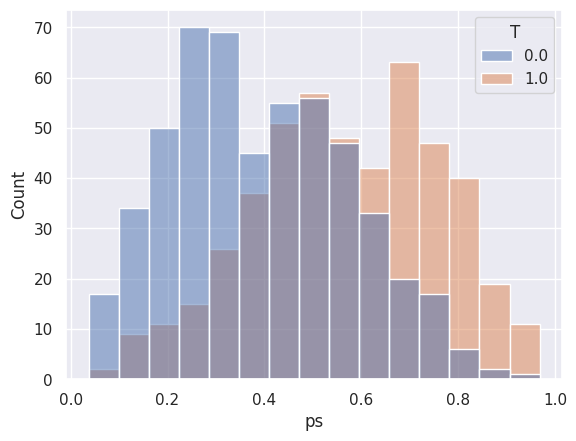

In [ ]:
# check the overlap of ps for control and treatment using histogram
# if not much overlap, the matching won't work
sns.histplot(data=df, x='ps', hue='T')  # multiple="dodge" for

In [ ]:
# Assuming matching_df is your DataFrame
caliper = np.std(df['ps']) * 0.25
print(f'caliper (radius) is: {caliper:.4f}')

n_neighbors = 10

# Setup the knn model
knn = NearestNeighbors(n_neighbors=n_neighbors, radius=caliper)

# Reshape the 'ps' column to be 2D
ps = df['ps'].values.reshape(-1, 1)  # Reshape to (n_samples, 1)

# Fit the model
knn.fit(ps)

caliper (radius) is: 0.0518


NearestNeighbors(n_neighbors=10, radius=0.05181302573221499)

In [ ]:
# distances and indexes
distances, neighbor_indexes = knn.kneighbors(ps)

print(neighbor_indexes.shape)

# the 10 closest points to the first point
print(distances[0])
print(neighbor_indexes[0])

(1000, 10)
[0.         0.00016691 0.00021847 0.00030515 0.001157   0.00158494
 0.00160356 0.0017871  0.00259022 0.00329314]
[  0 942 674 657 423 156 316 290 440 448]


In [ ]:
# for each point in treatment, we find a matching point in control without replacement
# note the 10 neighbors may include both points in treatment and control

matched_control = []  # keep track of the matched observations in control

for current_index, row in df.iterrows():  # iterate over the dataframe
    if row['T'] == 0.0:  # the current row is in the control group
        df.loc[current_index, 'matched'] = np.nan  # set matched to nan
    else:
        for idx in neighbor_indexes[current_index, :]: # for each row in treatment, find the k neighbors
            # make sure the current row is not the idx - don't match to itself
            # and the neighbor is in the control
            if (current_index != idx) and (df.loc[idx, 'T'] == 0.0):
                if idx not in matched_control:  # this control has not been matched yet
                    df.loc[current_index, 'matched'] = idx  # record the matching
                    matched_control.append(idx)  # add the matched to the list
                    break

In [ ]:
# try to increase the number of neighbors and/or caliper to get more matches
print('total observations in treatment:', len(df[df['T']==1.0]))
print('total matched observations in control:', len(matched_control))

total observations in treatment: 478
total matched observations in control: 297


In [ ]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,T,Y,ps,ps_logit,matched
0,-0.387169,0.110268,0.175983,-0.147001,0.230842,-0.836850,-0.824424,-0.656341,0.036155,-0.572011,-0.433431,-0.199374,0.623732,-0.972276,0.298758,0.337753,0.597312,0.865506,-0.959724,-0.692433,0.772343,-0.082963,0.129181,0.326054,0.358133,0.863481,0.993899,0.440315,-0.425558,0.759505,-0.901558,-0.537838,0.794771,-0.487617,-0.558698,-0.723749,0.718224,0.000117,0.349786,-0.521867,0.516081,0.520011,-0.374804,-0.178635,-0.580619,0.953122,0.291205,0.869088,-0.393229,0.563782,0.531717,0.383311,0.931278,-0.212889,-0.738565,0.343418,0.458620,0.150121,-0.586364,0.008912,-0.375621,-0.145067,0.290437,0.490429,-0.535551,-0.189349,-0.461677,-0.602737,0.566774,0.818505,-0.259536,0.502558,0.793991,0.692248,-0.634373,0.912584,-0.246647,-0.321519,-0.875137,-0.027653,-0.781973,-0.502920,-0.366115,0.617653,0.750977,-0.395067,0.717396,0.714462,0.529302,-0.706610,0.380646,0.890048,0.365081,-0.336766,0.001159,0.291450,0.021141,-0.760094,-0.375872,0.604792,0.722836,-0.725400,0.904774,-0.342355,0.324627,0.503650,0.623892,0.891499,-0.374161,0.717013,-0.736626,0.410082,0.483955,0.355446,-0.495371,0.746086,-0.662283,-0.892730,0.434930,-0.049049,0.698196,-0.233206,-0.663443,0.672884,0.097819,-0.621608,0.440768,0.022227,0.208626,-0.078203,0.657418,0.659125,0.418778,-0.789197,0.677708,0.342026,0.394048,-0.274034,0.758559,0.450743,-0.774819,-0.184444,0.772761,-0.905607,0.922833,0.358325,0.262752,-0.458881,-0.502416,0.884116,0.0,9.084150,0.539046,0.156503,NaN
1,-0.403455,0.551011,-0.213756,-0.721492,-0.978569,0.088515,0.951558,-0.261728,-0.285615,-0.311817,0.041088,-0.118670,0.759829,0.011042,0.015516,-0.723257,0.965479,-0.500054,-0.853272,0.326292,0.190733,-0.169709,-0.155616,0.570128,-0.608575,0.640507,0.297494,-0.162060,-0.083943,-0.486706,0.504229,0.025749,-0.358291,0.192100,0.991469,-0.129475,0.841383,-0.309966,-0.890535,-0.591516,-0.162610,-0.560730,-0.999546,0.830003,0.687759,0.484584,-0.664371,-0.759273,-0.864791,0.448058,0.857616,-0.138928,-0.761719,0.024786,-0.302336,-0.250350,0.242661,0.437436,-0.778793,-0.928820,0.988661,-0.534543,-0.892339,-0.620249,-0.922084,-0.216378,0.604804,-0.317511,-0.111633,0.351174,0.017788,0.722891,0.732071,-0.980179,0.556093,-0.078533,0.977681,-0.033536,0.973792,0.509139,-0.502790,0.076790,0.984271,0.715061,-0.805266,0.412744,-0.308841,-0.986035,-0.193038,-0.530491,0.637739,-0.325339,0.655047,-0.998804,-0.384362,-0.517670,-0.532865,-0.863627,-0.625751,0.111099,-0.417278,-0.165210,-0.246266,0.751810,0.810598,-0.014086,-0.339688,-0.786399,0.906806,-0.879546,-0.404699,-0.403868,-0.359197,-0.671426,0.566323,-0.755004,0.269813,-0.752308,-0.858929,0.818859,-0.619742,0.642500,0.089262,-0.844287,0.910896,-0.506078,0.719291,-0.662380,0.707886,-0.973542,0.023561,0.538885,0.869591,0.818404,0.639250,0.776383,-0.601561,-0.431631,-0.422063,-0.245892,-0.213359,0.089111,-0.680240,0.382493,-0.664867,-0.379383,0.006690,0.592881,0.478938,0.291069,1.0,22.882718,0.730453,0.996921,584.0
2,-0.688453,0.094091,-0.825107,-0.245274,-0.172967,-0.920377,-0.452024,0.911299,0.907265,-0.295346,-0.913800,-0.641810,-0.215564,0.895559,-0.717602,0.527032,-0.782635,0.962515,-0.236767,0.550469,-0.314818,0.255338,-0.615968,-0.707958,0.876128,0.835295,0.774938,0.250867,0.616536,-0.861926,-0.330422,-0.372594,0.271291,-0.288084,-0.702986,0.192934,0.628768,-0.235753,-0.735463,-0.606624,-0.525033,-0.400205,0

In [ ]:
# control have no match
treatment_matched = df.dropna(subset=['matched'])  # drop not matched

# matched control observation indexes
control_matched_idx = treatment_matched.matched
control_matched_idx = control_matched_idx.astype(int)  # change to int
control_matched = df.loc[control_matched_idx, :]  # select matched control observations

# combine the matched treatment and control
df_matched = pd.concat([treatment_matched, control_matched])

df_matched['T'].value_counts()

,count
T,
1.0,297
0.0,297


In [ ]:
# matched control and treatment
df_matched_control = df_matched[df_matched['T']==0.0]
df_matched_treatment = df_matched[df_matched['T']==1.0]

In [ ]:
# student's t-test for revenue (dependent variable) after matching
# p value is not significant now
print(df_matched_control['Y'].mean(), df_matched_treatment['Y'].mean())

# compare samples
_, p = ttest_ind(df_matched_control['Y'], df_matched_treatment['Y'])
print(f'p={p:.3f}')

# interpret
alpha = 0.05  # significance level
if p > alpha:
    print('same distributions/same group mean (fail to reject H0 - we do not have enough evidence to reject H0)')
else:
    print('different distributions/different group mean (reject H0)')

9.914789173104527 23.34320384785456
p=0.000
different distributions/different group mean (reject H0)


In [ ]:
ATE = df_matched_treatment['Y'].mean() - df_matched_control['Y'].mean()
print(f"Average Treatment Effect (ATE): {ATE}")

Average Treatment Effect (ATE): 13.428414674750034


### Adaptive Hyperboxes

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def fast_ahb(df, outcome_var, treatment_var, covariates, min_control=5, train_size=0.7,
             expansion_threshold=0.1, random_state=42):
    """
    Fast Adaptive Hyper-Box matching implementation

    Parameters:
    -----------
    df : pandas DataFrame
        The dataset
    outcome_var : str
        Name of the outcome variable
    treatment_var : str
        Name of the treatment variable
    covariates : list
        List of covariate names
    min_control : int
        Minimum number of control units required in each box
    train_size : float
        Proportion of data to use for training the outcome model
    expansion_threshold : float
        Threshold for stopping box expansion when outcome variability increases
    random_state : int
        Random seed for reproducibility

    Returns:
    --------
    dict : Dictionary containing boxes for each test unit and treatment effect estimates
    """

    X = df[covariates]
    y = df[outcome_var]
    T = df[treatment_var]

    X_train, X_test, y_train, y_test, T_train, T_test = train_test_split(
        X, y, T, train_size=train_size, random_state=random_state, stratify=T)


    rf_control = RandomForestRegressor(n_estimators=100, random_state=random_state)
    rf_treated = RandomForestRegressor(n_estimators=100, random_state=random_state)

    rf_control.fit(X_train[T_train == 0][covariates], y_train[T_train == 0])
    rf_treated.fit(X_train[T_train == 1][covariates], y_train[T_train == 1])


    f0_pred = rf_control.predict(X_test[covariates])
    f1_pred = rf_treated.predict(X_test[covariates])


    test_units = X_test.reset_index(drop=True)
    test_treatments = T_test.reset_index(drop=True)
    boxes = []
    matched_groups = []
    ite_estimates = []

    for i in range(len(test_units)):
        unit_i = test_units.iloc[i]
        treatment_i = test_treatments.iloc[i]


        box = {col: [unit_i[col], unit_i[col]] for col in covariates}


        prev_var = 0
        while True:

            in_box = is_in_box(test_units, box)
            units_in_box = test_units[in_box]
            treatments_in_box = test_treatments[in_box]


            n_control = sum(treatments_in_box == 0)
            if n_control >= min_control:

                control_pred = rf_control.predict(units_in_box[covariates])
                treated_pred = rf_treated.predict(units_in_box[covariates])

                current_var = (np.var(control_pred) + np.var(treated_pred)) / 2


                if current_var > prev_var * (1 + expansion_threshold) and n_control >= min_control:
                    break

                prev_var = current_var


            best_dim = None
            best_direction = None
            best_var_increase = float('inf')

            for dim in covariates:

                if any(test_units[dim] < box[dim][0]):
                    next_val = test_units[test_units[dim] < box[dim][0]][dim].max()
                    box_expansion = box.copy()
                    box_expansion[dim] = [next_val, box[dim][1]]


                    new_in_box = is_in_box(test_units, box_expansion)
                    new_units = test_units[new_in_box & ~in_box]

                    if len(new_units) > 0:
                        new_control_pred = rf_control.predict(new_units[covariates])
                        new_treated_pred = rf_treated.predict(new_units[covariates])

                        var_increase = (np.var(new_control_pred) + np.var(new_treated_pred)) / 2

                        if var_increase < best_var_increase:
                            best_var_increase = var_increase
                            best_dim = dim
                            best_direction = 'down'


                if any(test_units[dim] > box[dim][1]):
                    next_val = test_units[test_units[dim] > box[dim][1]][dim].min()
                    box_expansion = box.copy()
                    box_expansion[dim] = [box[dim][0], next_val]


                    new_in_box = is_in_box(test_units, box_expansion)
                    new_units = test_units[new_in_box & ~in_box]

                    if len(new_units) > 0:
                        new_control_pred = rf_control.predict(new_units[covariates])
                        new_treated_pred = rf_treated.predict(new_units[covariates])

                        var_increase = (np.var(new_control_pred) + np.var(new_treated_pred)) / 2

                        if var_increase < best_var_increase:
                            best_var_increase = var_increase
                            best_dim = dim
                            best_direction = 'up'


            if best_dim is None:
                break


            if best_direction == 'down':
                next_val = test_units[test_units[best_dim] < box[best_dim][0]][best_dim].max()
                box[best_dim][0] = next_val
            else:
                next_val = test_units[test_units[best_dim] > box[best_dim][1]][best_dim].min()
                box[best_dim][1] = next_val


            in_box = is_in_box(test_units, box)
            n_control = sum(test_treatments[in_box] == 0)
            if n_control >= min_control and best_var_increase > expansion_threshold * prev_var:
                break


        boxes.append(box)


        final_in_box = is_in_box(test_units, box)
        matched_group = test_units[final_in_box].index.tolist()
        matched_groups.append(matched_group)


        if treatment_i == 1:

            y_obs = y_test.iloc[i]
            control_units = test_units[final_in_box & (test_treatments == 0)]
            if len(control_units) > 0:
                y_cf = np.mean(y_test[control_units.index])
                ite = y_obs - y_cf
            else:
                ite = None
        else:

            y_obs = y_test.iloc[i]
            treated_units = test_units[final_in_box & (test_treatments == 1)]
            if len(treated_units) > 0:
                y_cf = np.mean(y_test[treated_units.index])
                ite = y_cf - y_obs
            else:
                ite = None

        ite_estimates.append(ite)

    # Return results
    results = {
        'boxes': boxes,
        'matched_groups': matched_groups,
        'ite_estimates': ite_estimates,
        'test_indices': X_test.index.tolist(),
        'test_treatments': T_test.tolist()
    }

    return results

def is_in_box(df, box):
    """
    Check which units are in a hyperbox

    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing units
    box : dict
        Dictionary with column names as keys and [min, max] as values

    Returns:
    --------
    pandas Series : Boolean series indicating which units are in the box
    """
    in_box = pd.Series([True] * len(df), index=df.index)

    for col, (min_val, max_val) in box.items():
        in_box = in_box & (df[col] >= min_val) & (df[col] <= max_val)

    return in_box


def run_fast_ahb_analysis(df):

    outcome_var = 'murders'
    treatment_var = 'treatment'

    covariates = [col for col in cols_matching if col != 'treatment']

    # Fast AHB
    results = fast_ahb(
        df=df_final,
        outcome_var=outcome_var,
        treatment_var=treatment_var,
        covariates=covariates,
        min_control=3,
        expansion_threshold=0.1,
        random_state=42
    )

    # Calculate ATT
    treated_indices = [i for i, t in enumerate(results['test_treatments']) if t == 1]
    treated_ites = [results['ite_estimates'][i] for i in treated_indices if results['ite_estimates'][i] is not None]

    att = np.mean(treated_ites) if treated_ites else None

    print(f"Estimated ATT: {att}")

    return results, att

In [ ]:
run_fast_ahb_analysis(df_final)

### V: MALTS

In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 22 00:43:45 2019

@author: harshparikh
"""

import numpy as np
import scipy.optimize as opt
import pandas as pd
import sklearn.linear_model as lm
import sklearn.ensemble as ensemble
import sklearn.gaussian_process as gp
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.model_selection import RepeatedStratifiedKFold
import warnings
warnings.filterwarnings("ignore")

class malts:
    def __init__(self,outcome,treatment,data,discrete=[],C=1,k=10,reweight=False):
        # np.random.seed(0)
        self.C = C #coefficient to regularozation term
        self.k = k
        self.reweight = reweight
        self.n, self.p = data.shape
        self.p = self.p - 2 #shape of the data
        self.outcome = outcome
        self.treatment = treatment
        self.discrete = discrete
        self.continuous = list(set(data.columns).difference(set([outcome]+[treatment]+discrete)))
        #splitting the data into control and treated units
        self.df_T = data.loc[data[treatment]==1]
        self.df_C = data.loc[data[treatment]==0]
        #extracting relevant covariates (discrete,continuous)
        #and outcome. Converting to numpy array.
        self.Xc_T = self.df_T[self.continuous].to_numpy()
        self.Xc_C = self.df_C[self.continuous].to_numpy()
        self.Xd_T = self.df_T[self.discrete].to_numpy()
        self.Xd_C = self.df_C[self.discrete].to_numpy()
        self.Y_T = self.df_T[self.outcome].to_numpy()
        self.Y_C = self.df_C[self.outcome].to_numpy()
        self.del2_Y_T = ((np.ones((len(self.Y_T),len(self.Y_T)))*self.Y_T).T - (np.ones((len(self.Y_T),len(self.Y_T)))*self.Y_T))**2
        self.del2_Y_C = ((np.ones((len(self.Y_C),len(self.Y_C)))*self.Y_C).T - (np.ones((len(self.Y_C),len(self.Y_C)))*self.Y_C))**2

        self.Dc_T = np.ones((self.Xc_T.shape[0],self.Xc_T.shape[1],self.Xc_T.shape[0])) * self.Xc_T.T
        self.Dc_T = (self.Dc_T - self.Dc_T.T)
        self.Dc_C = np.ones((self.Xc_C.shape[0],self.Xc_C.shape[1],self.Xc_C.shape[0])) * self.Xc_C.T
        self.Dc_C = (self.Dc_C - self.Dc_C.T)

        self.Dd_T = np.ones((self.Xd_T.shape[0],self.Xd_T.shape[1],self.Xd_T.shape[0])) * self.Xd_T.T
        self.Dd_T = (self.Dd_T != self.Dd_T.T)
        self.Dd_C = np.ones((self.Xd_C.shape[0],self.Xd_C.shape[1],self.Xd_C.shape[0])) * self.Xd_C.T
        self.Dd_C = (self.Dd_C != self.Dd_C.T)

    def threshold(self,x):
        k = self.k
        for i in range(x.shape[0]):
            row = x[i,:]
            row1 = np.where( row < row[np.argpartition(row,k+1)[k+1]],1,0)
            x[i,:] = row1
        return x

    def distance(self,Mc,Md,xc1,xd1,xc2,xd2):
        dc = np.dot((Mc**2)*(xc1-xc2),(xc1-xc2))
        dd = np.sum((Md**2)*xd1!=xd2)
        return dc+dd

    def loss_(self, Mc, Md, xc1, xd1, y1, xc2, xd2, y2, gamma=1 ):
        w12 = np.exp( -1 * gamma * self.distance(Mc,Md,xc1,xd1,xc2,xd2) )
        return w12*((y1-y2)**2)

    def calcW_T(self,Mc,Md):
        #this step is slow
        Dc = np.sum( ( self.Dc_T * (Mc.reshape(-1,1)) )**2, axis=1)
        Dd = np.sum( ( self.Dd_T * (Md.reshape(-1,1)) )**2, axis=1)
        W = self.threshold( (Dc + Dd) )
        W = W / (np.sum(W,axis=1)-np.diag(W)).reshape(-1,1)
        return W

    def calcW_C(self,Mc,Md):
        #this step is slow
        Dc = np.sum( ( self.Dc_C * (Mc.reshape(-1,1)) )**2, axis=1)
        Dd = np.sum( ( self.Dd_C * (Md.reshape(-1,1)) )**2, axis=1)
        W = self.threshold( (Dc + Dd) )
        W = W / (np.sum(W,axis=1)-np.diag(W)).reshape(-1,1)
        return W

    def Delta_(self,Mc,Md):
        self.W_T = self.calcW_T(Mc,Md)
        self.W_C = self.calcW_C(Mc,Md)
        self.delta_T = np.sum((self.Y_T - (np.matmul(self.W_T,self.Y_T) - np.diag(self.W_T)*self.Y_T))**2)
        self.delta_C = np.sum((self.Y_C - (np.matmul(self.W_C,self.Y_C) - np.diag(self.W_C)*self.Y_C))**2)
        if self.reweight == False:
            return self.delta_T + self.delta_C
        elif self.reweight == True:
            return (len(self.Y_T)+len(self.Y_C))*(self.delta_T/len(self.Y_T) + self.delta_C/len(self.Y_C))

    def objective(self,M):
        Mc = M[:len(self.continuous)]
        Md = M[len(self.continuous):]
        delta = self.Delta_(Mc,Md)
        reg = self.C * ( np.linalg.norm(Mc,ord=2)**2 + np.linalg.norm(Md,ord=2)**2 )
        cons1 = 0 * ( (np.sum(Mc) + np.sum(Md)) - self.p )**2
        cons2 = 1e+25 * np.sum( ( np.concatenate((Mc,Md)) < 0 ) )
        return delta + reg + cons1 + cons2

    def fit(self,method='COBYLA'):
        # np.random.seed(0)
        M_init = np.ones((self.p,))
        res = opt.minimize( self.objective, x0=M_init,method=method )
        self.M = res.x
        self.Mc = self.M[:len(self.continuous)]
        self.Md = self.M[len(self.continuous):]
        self.M_opt = pd.DataFrame(self.M.reshape(1,-1),columns=self.continuous+self.discrete,index=['Diag'])
        return res

    def get_matched_groups(self, df_estimation, k=10 ):
        #units to be matched
        Xc = df_estimation[self.continuous].to_numpy()
        Xd = df_estimation[self.discrete].to_numpy()
        Y = df_estimation[self.outcome].to_numpy()
        T = df_estimation[self.treatment].to_numpy()
        #splitted estimation data for matching
        df_T = df_estimation.loc[df_estimation[self.treatment]==1]
        df_C = df_estimation.loc[df_estimation[self.treatment]==0]
        #converting to numpy array
        Xc_T = df_T[self.continuous].to_numpy()
        Xc_C = df_C[self.continuous].to_numpy()
        Xd_T = df_T[self.discrete].to_numpy()
        Xd_C = df_C[self.discrete].to_numpy()
        Y_T = df_T[self.outcome].to_numpy()
        Y_C = df_C[self.outcome].to_numpy()
        D_T = np.zeros((Y.shape[0],Y_T.shape[0]))
        D_C = np.zeros((Y.shape[0],Y_C.shape[0]))
        #distance_treated
        Dc_T = (np.ones((Xc_T.shape[0],Xc.shape[1],Xc.shape[0])) * Xc.T - (np.ones((Xc.shape[0],Xc.shape[1],Xc_T.shape[0])) * Xc_T.T).T)
        Dc_T = np.sum( (Dc_T * (self.Mc.reshape(-1,1)) )**2 , axis=1 )
        Dd_T = (np.ones((Xd_T.shape[0],Xd.shape[1],Xd.shape[0])) * Xd.T != (np.ones((Xd.shape[0],Xd.shape[1],Xd_T.shape[0])) * Xd_T.T).T )
        Dd_T = np.sum( (Dd_T * (self.Md.reshape(-1,1)) )**2 , axis=1 )
        D_T = (Dc_T + Dd_T).T
        #distance_control
        Dc_C = (np.ones((Xc_C.shape[0],Xc.shape[1],Xc.shape[0])) * Xc.T - (np.ones((Xc.shape[0],Xc.shape[1],Xc_C.shape[0])) * Xc_C.T).T)
        Dc_C = np.sum( (Dc_C * (self.Mc.reshape(-1,1)) )**2 , axis=1 )
        Dd_C = (np.ones((Xd_C.shape[0],Xd.shape[1],Xd.shape[0])) * Xd.T != (np.ones((Xd.shape[0],Xd.shape[1],Xd_C.shape[0])) * Xd_C.T).T )
        Dd_C = np.sum( (Dd_C * (self.Md.reshape(-1,1)) )**2 , axis=1 )
        D_C = (Dc_C + Dd_C).T
        MG = {}
        index = df_estimation.index
        for i in range(Y.shape[0]):
            #finding k closest control units to unit i
            idx = np.argpartition(D_C[i,:],k)
            matched_df_C = pd.DataFrame( np.hstack( (Xc_C[idx[:k],:], Xd_C[idx[:k],:].reshape((k,len(self.discrete))), Y_C[idx[:k]].reshape(-1,1), D_C[i,idx[:k]].reshape(-1,1), np.zeros((k,1)) ) ), index=list(df_C.index[idx[:k]]), columns=self.continuous+self.discrete+[self.outcome,'distance',self.treatment] )
            #finding k closest treated units to unit i
            idx = np.argpartition(D_T[i,:],k)
            matched_df_T = pd.DataFrame( np.hstack( (Xc_T[idx[:k],:], Xd_T[idx[:k],:].reshape((k,len(self.discrete))), Y_T[idx[:k]].reshape(-1,1), D_T[i,idx[:k]].reshape(-1,1), np.ones((k,1)) ) ), index=list(df_T.index[idx[:k]]), columns=self.continuous+self.discrete+[self.outcome,'distance',self.treatment] )
            matched_df_2 = pd.DataFrame(np.hstack((Xc[i], Xd[i], Y[i], 0, T[i])).reshape(1,-1), index=list([-1]), columns=self.continuous+self.discrete+[self.outcome,'distance',self.treatment])
            matched_df =  pd.concat([matched_df_2, matched_df_T, matched_df_C], axis=0)
            MG[index[i]] = matched_df
            #{'unit':[ Xc[i], Xd[i], Y[i], T[i] ] ,'control':[ matched_Xc_C, matched_Xd_C, matched_Y_C, d_array_C],'treated':[matched_Xc_T, matched_Xd_T, matched_Y_T, d_array_T ]}
        MG_df = pd.concat(MG)
        return MG_df

    def CATE(self,MG,outcome_discrete=False,model='linear'):
        print("📌 Entered modified CATE()")
        cate = {}
        for k in pd.unique(MG.index.get_level_values(0)):
            v = MG.loc[k]
            #control
            matched_X_C = v.loc[v[self.treatment]==0].drop(index=-1,errors='ignore')[self.continuous+self.discrete]
            matched_Y_C = v.loc[v[self.treatment]==0].drop(index=-1,errors='ignore')[self.outcome]
            #treated
            matched_X_T = v.loc[v[self.treatment]==1].drop(index=-1,errors='ignore')[self.continuous+self.discrete]
            matched_Y_T = v.loc[v[self.treatment]==1].drop(index=-1,errors='ignore')[self.outcome]
            x = v.loc[-1][self.continuous+self.discrete].to_numpy().reshape(1,-1)

            vc = v[self.continuous].to_numpy()
            vd = v[self.discrete].to_numpy()
            dvc = np.ones((vc.shape[0],vc.shape[1],vc.shape[0])) * vc.T
            dist_cont = np.sum( ( (dvc - dvc.T) * (self.Mc.reshape(-1,1)) )**2, axis=1)
            dvd = np.ones((vd.shape[0],vd.shape[1],vd.shape[0])) * vd.T
            dist_dis = np.sum( ( (dvd - dvd.T) * (self.Md.reshape(-1,1)) )**2, axis=1)
            dist_mat = dist_cont + dist_dis
            diameter = np.max(dist_mat)

            if not outcome_discrete:
                try:
                    if model=='mean':
                        yt = np.mean(matched_Y_T)
                        yc = np.mean(matched_Y_C)
                        cate[k] = {'CATE': yt - yc,'outcome':v.loc[-1][self.outcome],'treatment':v.loc[-1][self.treatment],'diameter':diameter }
                    if model=='linear':
                        yc = lm.Ridge().fit( X = matched_X_C, y = matched_Y_C )
                        yt = lm.Ridge().fit( X = matched_X_T, y = matched_Y_T )
                        cate[k] = {'CATE': yt.predict(x)[0] - yc.predict(x)[0], 'outcome':v.loc[-1][self.outcome],'treatment':v.loc[-1][self.treatment],'diameter':diameter }
                    if model=='RF':
                        yc = ensemble.RandomForestRegressor().fit( X = matched_X_C, y = matched_Y_C )
                        yt = ensemble.RandomForestRegressor().fit( X = matched_X_T, y = matched_Y_T )
                        cate[k] = {'CATE': yt.predict(x)[0] - yc.predict(x)[0], 'outcome':v.loc[-1][self.outcome],'treatment':v.loc[-1][self.treatment],'diameter':diameter }
                except Exception as e:
                  print(f"\n⚠️ Error for unit {k}: {e}")
                  print(f"  → matched_X_C shape: {matched_X_C.shape}, matched_Y_C shape: {matched_Y_C.shape}")
                  print(f"  → matched_X_T shape: {matched_X_T.shape}, matched_Y_T shape: {matched_Y_T.shape}")
                  print(f"  → v.loc[-1]:\n{v.loc[-1]}")
                  cate[k] = {'CATE': np.nan, 'outcome': v.loc[-1][self.outcome],'treatment': v.loc[-1][self.treatment], 'diameter': diameter}
        return pd.DataFrame.from_dict(cate,orient='index')

    def visualizeMG(self,MG,a):
        MGi = MG.loc[a]
        k = int( (MGi.shape[0] - 1 )/2 )
        df = MGi[self.continuous+self.discrete].drop(index=-1)

        df.index.names = ['Unit']
        df.columns.names = ['Covariate']
        tidy = df.stack().to_frame().reset_index().rename(columns={0: 'Covariate Value'})

        T = np.array([0 for i in range(0,k*self.p)] + [1 for i in range(0,k*self.p)])
        tidy[self.treatment] = T

        y0 = np.ones((self.p,k)) * MGi.loc[MGi[self.treatment]==0][self.outcome].drop(index=-1,errors='ignore').to_numpy()
        y0 = y0.flatten('F')
        y1 = np.ones((self.p,k)) * MGi.loc[MGi[self.treatment]==1][self.outcome].drop(index=-1,errors='ignore').to_numpy()
        y1 = y0.flatten('F')
        tidy[self.outcome] = np.hstack( (y0,y1) )
        fig = plt.figure()
        sns.lmplot(sharey=False,sharex=False,x='Covariate Value',y=self.outcome,hue=self.treatment, col='Covariate', data=tidy, col_wrap=3, height=4)
        fig.savefig('matched_group_%d.png'%(a))

        fig = plt.figure(figsize=(15,20))
        pd.plotting.parallel_coordinates(df,self.treatment,colormap=plt.cm.Set1)
        fig.savefig('parallel_coordinate_matched_group_%d.png'%(a))

        return tidy

    def visualizeDimension(self,MG,x1,x2):
        X = []
        fig,ax = plt.subplots(1)
        for k,MGi in MG.items():
            x = np.hstack( (MGi['unit'][0],MGi['unit'][0]) )[ [ x1, x2 ] ]
            X.append(x)
            Xc = np.vstack( (MGi['control'][0],MGi['treated'][0]) )
            Xd = np.vstack( (MGi['control'][1],MGi['treated'][1]) )
            Xm = np.hstack((Xc,Xd))[:,[x1,x2]]
            x1min,x1max = np.min(Xm[:,0]), np.max(Xm[:,0])
            x2min,x2max = np.min(Xm[:,1]), np.max(Xm[:,1])
            rect = patches.Rectangle(x-np.array([(x1max-x1min)/2,(x2max-x2min)/2]),width=x1max-x1min,height=x2max-x2min,linewidth=1,edgecolor='r',facecolor='grey',alpha=0.06)
            ax.add_patch(rect)
        X = np.array(X)
        plt.scatter(X[:,0],X[:,1])
        fig.savefig('marginal_%d_%d_matched_groups.png')
        return X


class malts_mf:
    def __init__(self,outcome,treatment,data,discrete=[], C=1, k_tr=15, k_est=50, estimator='linear', smooth_cate=True, reweight=False,n_splits=5,n_repeats=1,output_format='brief'):
        self.n_splits = n_splits
        self.C = C
        self.k_tr = k_tr
        self.k_est = k_est
        self.outcome = outcome
        self.treatment = treatment
        self.discrete = discrete
        self.continuous = list(set(data.columns).difference(set([outcome]+[treatment]+discrete)))
        self.reweight = reweight

        skf = RepeatedStratifiedKFold(n_splits=n_splits,n_repeats=n_repeats,random_state=0)
        gen_skf = skf.split(data,data[treatment])
        self.M_opt_list = []
        self.MG_list = []
        self.CATE_df = pd.DataFrame()
        N = np.zeros((data.shape[0],data.shape[0]))
        self.MG_matrix = pd.DataFrame(N, columns=data.index, index=data.index)

        i = 0
        for est_idx, train_idx in gen_skf:
            df_train = data.iloc[train_idx]
            df_est = data.iloc[est_idx]
            m = malts( outcome, treatment, data=df_train, discrete=discrete, C=self.C, k=self.k_tr, reweight=self.reweight )
            m.fit()
            self.M_opt_list.append(m.M_opt)
            mg = m.get_matched_groups(df_est,k_est)
            self.MG_list.append(mg)
            self.CATE_df = pd.concat([self.CATE_df, m.CATE(mg,model=estimator)], join='outer', axis=1)

        for i in range(n_splits*n_repeats):
            mg_i = self.MG_list[i]
            for a in mg_i.index:
                if a[1]!=-1:
                    self.MG_matrix.loc[a[0],a[1]] = self.MG_matrix.loc[a[0],a[1]]+1

        cate_df = self.CATE_df['CATE']
        cate_df['avg.CATE'] = cate_df.mean(axis=1)
        cate_df['std.CATE'] = cate_df.std(axis=1)
        cate_df[self.outcome] = self.CATE_df['outcome'].mean(axis=1)
        cate_df[self.treatment] = self.CATE_df['treatment'].mean(axis=1)
        cate_df['avg.Diameter'] = self.CATE_df['diameter'].mean(axis=1)

        LOWER_ALPHA = 0.05
        UPPER_ALPHA = 0.95
        # Each model has to be separate
        lower_model = ensemble.GradientBoostingRegressor(loss='quantile',alpha=LOWER_ALPHA)
        # The mid model will use the default loss
        mid_model = ensemble.GradientBoostingRegressor(loss="ls")
        upper_model = ensemble.GradientBoostingRegressor(loss="quantile",alpha=UPPER_ALPHA)

        try:
            lower_model.fit(data[self.continuous+self.discrete], cate_df['avg.CATE'])
            mid_model.fit(data[self.continuous+self.discrete], cate_df['avg.CATE'])
            upper_model.fit(data[self.continuous+self.discrete], cate_df['avg.CATE'])

            cate_df['std.gbr.CATE'] = np.abs(upper_model.predict(data[self.continuous+self.discrete]) - lower_model.predict(data[self.continuous+self.discrete]))/4
            cate_df['avg.gbr.CATE'] = mid_model.predict(data[self.continuous+self.discrete])

            # kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-10, np.std(cate_df['avg.CATE'])))
            # gaussian_model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100,normalize_y=True)
            # gaussian_model.fit(data[self.continuous+self.discrete], cate_df['avg.CATE'])
            # gp_pred = gaussian_model.predict(data[self.continuous+self.discrete], return_std=True)
            # cate_df['std.gp.CATE'] = gp_pred[1]
            # cate_df['avg.gp.CATE'] = gp_pred[0]

            # bayes_ridge = lm.BayesianRidge(fit_intercept=True)
            # bayes_ridge.fit(data[self.continuous+self.discrete], cate_df['avg.CATE'])
            # br_pred = bayes_ridge.predict(data[self.continuous+self.discrete], return_std=True)
            # cate_df['std.br.CATE'] = br_pred[1]
            # cate_df['avg.br.CATE'] = br_pred[0]

            if smooth_cate:
                cate_df['avg.CATE'] = cate_df['avg.gbr.CATE']
            cate_df['std.CATE'] = cate_df['std.gbr.CATE']

            if output_format=='brief':
                self.CATE_df = cate_df[['avg.CATE','std.CATE',outcome,treatment]]
            if output_format=='full':
                self.CATE_df = cate_df
        except:
            self.CATE_df = cate_df

In [11]:
m = malts_mf(outcome='Y', treatment='T', data=df)

📌 Entered modified CATE()
📌 Entered modified CATE()
📌 Entered modified CATE()
📌 Entered modified CATE()
📌 Entered modified CATE()


In [12]:
m.CATE_df

,CATE,CATE,CATE,CATE,CATE,avg.CATE,std.CATE,Y,T,avg.Diameter
0,13.150636,12.676928,NaN,12.753807,12.738555,12.829982,0.187354,21.462466,1.0,179.223717
1,14.086140,14.115478,15.553094,NaN,14.144621,14.474833,0.622877,10.892128,0.0,171.755775
3,11.822409,12.401983,NaN,11.003289,9.831655,11.264834,0.965195,11.227252,0.0,182.173249
7,11.809690,NaN,10.461865,11.390895,12.376925,11.509844,0.698954,11.475772,0.0,193.464762
8,12.930239,11.566821,13.773616,NaN,10.984517,12.313798,1.099549,9.825616,0.0,182.948216
...,...,...,...,...,...,...,...,...,...,...
980,NaN,12.403571,13.234448,11.544782,12.276791,12.364898,0.599576,22.555296,1.0,184.541648
981,NaN,13.164374,12.971552,13.595337,12.638892,13.092539,0.345832,24.215653,1.0,180.458102
989,NaN,15.223259,14.523884,15.271103,13.757997,14.694061,0.616077,24.814995,1.0,171.798886
992,NaN,14.856246,13.606751,13.127207,12.614988,13.551298,0.831038,8.020251,0.0,181.951274


In [13]:
ATE = m.CATE_df['avg.CATE'].mean()
ATE

np.float64(13.425733248774105)

### N: Lasso Coefficient Matching

Reference : https://github.com/almost-matching-exactly/variable_imp_matching/tree/main/Experiments

Paper : https://arxiv.org/pdf/2302.11715

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.neighbors import NearestNeighbors

In [ ]:
#df_clean = df_final[cols_matching].dropna().reset_index()
X = matching_df.drop(columns=['treatment','synth_treatment','murders_simulated','treatment_effect','murders_simulated_cate','index'])
T = matching_df['synth_treatment'].values

In [ ]:
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X, T)

LassoCV(cv=5, random_state=42)

In [ ]:
coefs = np.abs(lasso.coef_)
W = np.diag(coefs)

In [ ]:
X_weighted = X.values @ W

In [ ]:
X_treated = X_weighted[T == 1]
X_control = X_weighted[T == 0]
df_treated = matching_df[T == 1]
df_control = matching_df[T == 0]

In [ ]:
# Nearest Neighbor Matching (Manhattan Distance)
nn = NearestNeighbors(n_neighbors=1, metric='manhattan')
nn.fit(X_control)
distances, indices = nn.kneighbors(X_treated)

In [ ]:
matched_controls = df_control.iloc[indices.flatten()].reset_index(drop=True)
matched_treated = df_treated.reset_index(drop=True)

In [ ]:
matched_controls

,index,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,persUrban,pctUrban,medIncome,pctWwage,pctWfarm,pctWdiv,pctWsocsec,pctPubAsst,pctRetire,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,otherPerCap,hispPerCap,persPoverty,pctPoverty,pctLowEdu,pctNotHSgrad,pctCollGrad,pctUnemploy,pctEmploy,pctEmployMfg,pctEmployProfServ,pctOccupManu,pctOccupMgmt,pctMaleDivorc,pctMaleNevMar,pctFemDivorc,pctAllDivorc,persPerFam,pct2Par,pctKids2Par,pctKids-4w2Par,pct12-17w2Par,pctWorkMom-6,pctWorkMom-18,kidsBornNevrMarr,pctKidsBornNevrMarr,numForeignBorn,pctFgnImmig-3,pctFgnImmig-5,pctFgnImmig-8,pctFgnImmig-10,pctImmig-3,pctImmig-5,pctImmig-8,pctImmig-10,pctSpeakOnlyEng,pctNotSpeakEng,pctLargHousFam,pctLargHous,persPerOccupHous,persPerOwnOccup,persPerRenterOccup,pctPersOwnOccup,pctPopDenseHous,pctSmallHousUnits,medNumBedrm,houseVacant,pctHousOccup,pctHousOwnerOccup,pctVacantBoarded,pctVacant6up,medYrHousBuilt,pctHousWOphone,pctHousWOplumb,ownHousLowQ,ownHousMed,ownHousUperQ,ownHousQrange,rentLowQ,rentMed,rentUpperQ,rentQrange,medGrossRent,medRentpctHousInc,medOwnCostpct,medOwnCostPctWO,persEmergShelt,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_ID,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MO,State_MS,State_NC,State_ND,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,treatment,synth_treatment,murders_simulated,treatment_effect,murders_simulated_cate
0,1286,52434,2.54,8.69,88.92,1.78,2.02,12.60,24.40,12.81,17.14,50241,95.82,41814,77.24,0.32,58.35,34.09,3.83,19.63,50228,19383,19802,16134,10384,16426,11480.0,12176,2199,4.36,6.97,15.22,32.38,3.83,64.65,13.90,33.36,7.76,35.04,6.44,30.00,8.76,7.71,2.99,82.45,80.38,93.66,84.54,63.33,74.37,485,1.38,3753,8.13,14.73,21.77,27.82,0.58,1.05,1.56,1.99,88.88,0.86,3.24,2.33,2.43,2.63,1.97,75.88,0.96,45.40,3,1097,94.95,70.21,1.37,35.28,1957,0.97,0.31,135700,164000,197100,61400,467,600,702,235,680,29.1,22.4,14.3,28,0,7.16,65.75,60.29,86.18,90.20,2,3.77,8.0,15.07,52.0,97.95,32.0,60.28,239.0,450.19,1646.0,3100.45,231.0,435.12,1.0,1.88,177.06,3987.64,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,6.691163,3.330867
1,569,11234,2.49,0.55,98.33,0.83,0.91,10.05,19.89,9.15,17.44,11234,100.00,40926,77.87,0.65,69.00,34.56,1.94,21.64,45637,18481,18590,13611,12141,17686,13810.0,8696,377,3.36,5.48,16.67,29.34,4.23,60.85,15.18,26.10,6.26,36.89,5.47,22.38,9.14,7.41,2.91,86.31,86.39,95.11,88.51,51.76,66.16,43,0.46,408,1.72,1.72,2.94,11.27,0.06,0.06,0.11,0.41,95.41,0.86,2.89,2.22,2.49,2.53,2.14,92.02,0.58,23.37,3,83,98.19,90.71,1.20,22.89,1958,0.35,0.00,75400,91500,115600,40200,352,392,497,145,469,27.9,15.6,11.4,0,0,3.63,73.06,73.14,87.69,96.35,0,0.00,1.0,8.88,7.0,62.16,6.0,53.28,34.0,301.93,600.0,5328.12,19.0,168.72,4.0,35.52,124.32,5834.30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6.655248,-0.124976
2,1573,10034,3.06,0.58,93.94,1.45,0.99,35.63,54.39,43.25,6.54,0,0.00,16478,85.18,2.69,46.97,18.73,3.97,8.99,26422,8342,8611,8695,3513,4746,4272.0,3380,2341,30.65,6.81,13.14,44.25,6.80,58.31,3.08,48.68,7.67,35.54,4.38,59.21,7.39,5.96,2.98,70.33,71.64,85.17,67.65,63.87,71.40,173,3.27,170,55.88,61.18,67.06,70.59,0.95,1.04,1.14,1.20,95.94,0.67,4.06,2.35,2.32,2.68,2.02,52.96,2.50,53.30,2,153,95.54,45.95,0.65,37.91,1965,4.03,0.00,39800,51600,69400,29600,181,244,316,135,286,33.2,20.5,12.1,0,0,1.69,57.80,26.93,42.29,76.89,0,0.00,2.0,19.06,1.0,9.53,5.0,47.65,52.0,495.5

In [ ]:
matched_treated

,index,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,persUrban,pctUrban,medIncome,pctWwage,pctWfarm,pctWdiv,pctWsocsec,pctPubAsst,pctRetire,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,otherPerCap,hispPerCap,persPoverty,pctPoverty,pctLowEdu,pctNotHSgrad,pctCollGrad,pctUnemploy,pctEmploy,pctEmployMfg,pctEmployProfServ,pctOccupManu,pctOccupMgmt,pctMaleDivorc,pctMaleNevMar,pctFemDivorc,pctAllDivorc,persPerFam,pct2Par,pctKids2Par,pctKids-4w2Par,pct12-17w2Par,pctWorkMom-6,pctWorkMom-18,kidsBornNevrMarr,pctKidsBornNevrMarr,numForeignBorn,pctFgnImmig-3,pctFgnImmig-5,pctFgnImmig-8,pctFgnImmig-10,pctImmig-3,pctImmig-5,pctImmig-8,pctImmig-10,pctSpeakOnlyEng,pctNotSpeakEng,pctLargHousFam,pctLargHous,persPerOccupHous,persPerOwnOccup,persPerRenterOccup,pctPersOwnOccup,pctPopDenseHous,pctSmallHousUnits,medNumBedrm,houseVacant,pctHousOccup,pctHousOwnerOccup,pctVacantBoarded,pctVacant6up,medYrHousBuilt,pctHousWOphone,pctHousWOplumb,ownHousLowQ,ownHousMed,ownHousUperQ,ownHousQrange,rentLowQ,rentMed,rentUpperQ,rentQrange,medGrossRent,medRentpctHousInc,medOwnCostpct,medOwnCostPctWO,persEmergShelt,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_ID,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MO,State_MS,State_NC,State_ND,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,treatment,synth_treatment,murders_simulated,treatment_effect,murders_simulated_cate
0,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,0,0.00,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.000000,4.250000,127.56,1955.950000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5,6.937998,6.716885
1,2,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,3,8.30,6.0,16.60,56.0,154.95,14.0,38.74,274.0,758.14,1797.0,4972.19,136.0,376.30,22.000000,60.870000,218.59,6167.510000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,6.442629,8.602347
2,3,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,0.24,38.95,39.48,11.71,18.33,26501,10810,10909,9984,4941,3541,2451.0,4391,2831,17.23,11.05,33.68,10.81,9.86,54.74,31.22,27.43,26.76,22.71,10.98,28.15,14.47,12.91,2.98,64.02,62.36,65.38,67.43,59.59,70.27,561,3.84,339,13.86,13.86,15.34,15.34,0.28,0.28,0.31,0.31,94.98,0.56,3.93,2.56,2.37,2.51,2.20,58.18,1.21,45.66,3,669,91.19,54.89,2.54,57.85,1939,7.00,0.87,36400,49600,66500,30100,195,250,309,114,333,28.7,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24,0,0.00,10.0,57.86

In [ ]:
df_matched_lasso = pd.concat([matched_treated, matched_controls])

In [ ]:
df_matched_lasso

,index,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,persUrban,pctUrban,medIncome,pctWwage,pctWfarm,pctWdiv,pctWsocsec,pctPubAsst,pctRetire,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,otherPerCap,hispPerCap,persPoverty,pctPoverty,pctLowEdu,pctNotHSgrad,pctCollGrad,pctUnemploy,pctEmploy,pctEmployMfg,pctEmployProfServ,pctOccupManu,pctOccupMgmt,pctMaleDivorc,pctMaleNevMar,pctFemDivorc,pctAllDivorc,persPerFam,pct2Par,pctKids2Par,pctKids-4w2Par,pct12-17w2Par,pctWorkMom-6,pctWorkMom-18,kidsBornNevrMarr,pctKidsBornNevrMarr,numForeignBorn,pctFgnImmig-3,pctFgnImmig-5,pctFgnImmig-8,pctFgnImmig-10,pctImmig-3,pctImmig-5,pctImmig-8,pctImmig-10,pctSpeakOnlyEng,pctNotSpeakEng,pctLargHousFam,pctLargHous,persPerOccupHous,persPerOwnOccup,persPerRenterOccup,pctPersOwnOccup,pctPopDenseHous,pctSmallHousUnits,medNumBedrm,houseVacant,pctHousOccup,pctHousOwnerOccup,pctVacantBoarded,pctVacant6up,medYrHousBuilt,pctHousWOphone,pctHousWOplumb,ownHousLowQ,ownHousMed,ownHousUperQ,ownHousQrange,rentLowQ,rentMed,rentUpperQ,rentQrange,medGrossRent,medRentpctHousInc,medOwnCostpct,medOwnCostPctWO,persEmergShelt,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_ID,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MO,State_MS,State_NC,State_ND,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,treatment,synth_treatment,murders_simulated,treatment_effect,murders_simulated_cate
0,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.00,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,0,0.00,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.000000,4.250000,127.56,1955.950000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5,6.937998,6.716885
1,2,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.00,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,3,8.30,6.0,16.60,56.0,154.95,14.0,38.74,274.0,758.14,1797.0,4972.19,136.0,376.30,22.000000,60.870000,218.59,6167.510000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,6.442629,8.602347
2,3,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,0,0.00,20580,68.15,0.24,38.95,39.48,11.71,18.33,26501,10810,10909,9984,4941,3541,2451.0,4391,2831,17.23,11.05,33.68,10.81,9.86,54.74,31.22,27.43,26.76,22.71,10.98,28.15,14.47,12.91,2.98,64.02,62.36,65.38,67.43,59.59,70.27,561,3.84,339,13.86,13.86,15.34,15.34,0.28,0.28,0.31,0.31,94.98,0.56,3.93,2.56,2.37,2.51,2.20,58.18,1.21,45.66,3,669,91.19,54.89,2.54,57.85,1939,7.00,0.87,36400,49600,66500,30100,195,250,309,114,333,28.7,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24,0,0.00,10.0,57

In [ ]:
from psmpy.functions import cohenD

#before matching
cohenD_before = cohenD(df_clean, 'treatment', 'murders')

# after matching
cohenD_after = cohenD(df_matched_lasso, 'treatment', 'murders')

print("Cohen's D before matching (murders):", cohenD_before)
print("Cohen's D after matching (murders):", cohenD_after)


ModuleNotFoundError: No module named 'psmpy'

In [ ]:
outcome = 'murders'

# ATT
att = df_matched_lasso[df_matched_lasso['treatment'] == 1][outcome].mean() - df_matched_lasso[df_matched_lasso['treatment'] == 0][outcome].mean()
print(f"ATT: {att}")

# ATE
ate = df_matched_lasso[outcome].mean() - df_matched_lasso[df_matched_lasso['treatment'] == 0][outcome].mean()
print(f"ATE: {ate}")


ATT: -18.654698999058123
ATE: -15.588551532776606


For units with ≤ 20% Black population, their violent crime rates were 0.107 points lower compared to similar units that had > 20% Black population.

### N: Causal Forest

Mainly used for heterogenuous treatment effects

In [ ]:
!pip install -q econml
import econml

In [ ]:
from econml.dml import CausalForestDML
from sklearn.ensemble import RandomForestRegressor

option 1: https://www.kaggle.com/code/carlmcbrideellis/causal-forests-double-ml-example-using-econml

* has continuous treatment var in og data

In [ ]:
non_parametric_model = CausalForestDML(model_y=RandomForestRegressor(random_state=0),
                                       model_t=RandomForestRegressor(random_state=0),
                                       criterion='mse', n_estimators=1000,
                                       min_impurity_decrease=0.001,random_state=0)

In [ ]:
X_test = np.array(list(product(np.arange(0, 1, 0.01), repeat=1)))

non_parametric_model.fit(Y, T, X=X, W=W);
non_parametric_model_results = non_parametric_model.effect(X_test)
lb, ub                       = non_parametric_model.effect_interval(X_test, alpha=0.01)

# plot the reults
plt.figure(figsize=(10,6))
# double ML results plot
plt.plot(X_test, non_parametric_model_results, label='Non-parametric double ML')
plt.fill_between(X_test[:, 0], lb, ub, alpha=.4)
# ground truth plot
ground_truth = np.array([true_relationship(x_i) for x_i in X_test])
plt.plot(X_test, ground_truth, '--', label='True effect', c='black')
plt.ylabel('Outcome (Effect)')
plt.xlabel('Treatment (Cause)')
plt.legend(loc='upper left')
plt.show();

option 2: https://github.com/py-why/EconML/blob/main/notebooks/Causal%20Forest%20and%20Orthogonal%20Random%20Forest%20Examples.ipynb

In [ ]:
est2 = CausalForestDML(model_y=Lasso(alpha=lambda_reg),
                       model_t=LogisticRegression(C=1/(X.shape[0]*lambda_reg)),
                       n_estimators=200, min_samples_leaf=5,
                       max_depth=50, max_samples=subsample_ratio/2,
                       discrete_treatment=True,
                       random_state=123)
est2.fit(Y, T, X=X, W=W, cache_values=True)
treatment_effects2 = est2.effect(X_test)
te_lower2, te_upper2 = est2.effect_interval(X_test)

In [ ]:
est2.summary()

### N: Inverse Propensity Weighting

In [ ]:
X = matching_df[['pop','perHoush','pctBlack','pctWhite','pctAsian','pctHisp','pct12-21','pct12-29','pct16-24','pct65up','persUrban','pctUrban','medIncome','pctWwage','pctWfarm',
                 'pctWdiv','pctWsocsec','pctPubAsst','pctRetire','medFamIncome','perCapInc','whitePerCap','blackPerCap','NAperCap','asianPerCap','otherPerCap','hispPerCap',
                 'persPoverty','pctPoverty','pctLowEdu','pctNotHSgrad','pctCollGrad','pctUnemploy','pctEmploy','pctEmployMfg','pctEmployProfServ','pctOccupManu','pctOccupMgmt',
                 'pctMaleDivorc','pctMaleNevMar','pctFemDivorc','pctAllDivorc','persPerFam','pct2Par','pctKids2Par','pctKids-4w2Par','pct12-17w2Par','pctWorkMom-6','pctWorkMom-18',
                 'kidsBornNevrMarr','pctKidsBornNevrMarr','numForeignBorn','pctFgnImmig-3','pctFgnImmig-5','pctFgnImmig-8','pctFgnImmig-10','pctImmig-3','pctImmig-5','pctImmig-8',
                 'pctImmig-10','pctSpeakOnlyEng','pctNotSpeakEng','pctLargHousFam','pctLargHous','persPerOccupHous','persPerOwnOccup','persPerRenterOccup','pctPersOwnOccup',
                 'pctPopDenseHous','pctSmallHousUnits','medNumBedrm','houseVacant','pctHousOccup','pctHousOwnerOccup','pctVacantBoarded','pctVacant6up','medYrHousBuilt',
                 'pctHousWOphone','pctHousWOplumb','ownHousLowQ','ownHousMed','ownHousUperQ','ownHousQrange','rentLowQ','rentMed','rentUpperQ','rentQrange','medGrossRent',
                 'medRentpctHousInc','medOwnCostpct','medOwnCostPctWO','persEmergShelt','persHomeless','pctForeignBorn','pctBornStateResid','pctSameHouse-5','pctSameCounty-5',
                 'pctSameState-5','murders_simulated','murdPerPop','rapes','rapesPerPop','robberies','robbbPerPop','assaults','assaultPerPop','burglaries','burglPerPop','larcenies',
                 'larcPerPop','autoTheft','autoTheftPerPop','arsons','arsonsPerPop','violentPerPop','nonViolPerPop',
                 'State_AK','State_AL','State_AR','State_AZ','State_CA','State_CO','State_CT','State_DC','State_DE','State_FL','State_GA','State_IA','State_ID','State_IN',
                 'State_KS','State_KY','State_LA','State_MA','State_MD','State_ME','State_MO','State_MS','State_NC','State_ND','State_NH','State_NJ','State_NM','State_NV',
                 'State_NY','State_OH','State_OK','State_OR','State_PA','State_RI','State_SC','State_SD','State_TN','State_TX','State_UT','State_VA','State_VT','State_WA',
                 'State_WI','State_WV','State_WY',]]
T = matching_df['synth_treatment']

In [ ]:
r = LogisticRegression(solver='liblinear', max_iter=10000)

r.fit(X, T)

LogisticRegression(max_iter=10000, solver='liblinear')

In [ ]:
p = r.predict_proba(X)[:, 1]

In [ ]:
keep_idx = (p >= 0.1) & (p <= 0.9)

In [ ]:
matching_df_new = matching_df[keep_idx, :]

InvalidIndexError: (array([ True,  True,  True, ...,  True,  True,  True]), slice(None, None, None))

In [ ]:
wts = np.where(matching_df['synth_treatment'] == 1, 1 / p, 1 / (1 - p))

<ipython-input-41-89ac6c65bb19>:1: RuntimeWarning: divide by zero encountered in divide
  wts = np.where(matching_df['synth_treatment'] == 1, 1 / p, 1 / (1 - p))


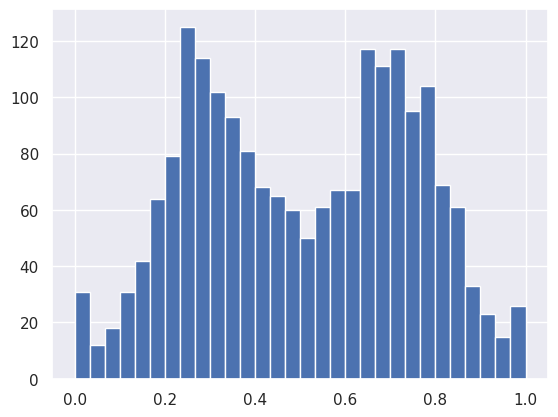

In [ ]:
plt.hist(p, bins=30)

plt.show()

In [ ]:
matching_df['weights'] = wts

ate_estimate = (matching_df.loc[matching_df['synth_treatment'] == 1, 'murders_simulated'] * matching_df.loc[matching_df['synth_treatment'] == 1, 'weights']).mean() - (matching_df.loc[matching_df['synth_treatment'] == 0, 'murders_simulated'] * matching_df.loc[matching_df['synth_treatment'] == 0, 'weights']).mean()

print(ate_estimate)

### V: [Genetic Matching](https://ngreifer.github.io/blog/genetic-matching/)

library documentation: https://kosukeimai.github.io/MatchIt/reference/method_genetic.html

In [14]:
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr, data

from rpy2.robjects import r
from rpy2.robjects import pandas2ri
import rpy2.robjects as robjects
pandas2ri.activate()

%load_ext rpy2.ipython

In [15]:
%%R
install.packages("MatchIt")
install.packages("Matching")
install.packages("rgenoud")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘chk’, ‘RcppProgress’

trying URL 'https://cran.rstudio.com/src/contrib/chk_0.10.0.tar.gz'
Content type 'application/x-gzip' length 687404 bytes (671 KB)
downloaded 671 KB

trying URL 'https://cran.rstudio.com/src/contrib/RcppProgress_0.4.2.tar.gz'
Content type 'application/x-gzip' length 12077 bytes (11 KB)
downloaded 11 KB

trying URL 'https://cran.rstudio.com/src/contrib/MatchIt_4.7.1.tar.gz'
Content type 'application/x-gzip' length 1502128 bytes (1.4 MB)
downloaded 1.4 MB


The downloaded source packages are in
	‘/tmp/RtmptAxxyF/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/Matching_4.10-15.tar.gz'
Content type 'application/x-gzip' length 254274 bytes (248 KB)
downloaded 248 KB


The downloaded source packages are in
	‘/tmp/RtmptAxxyF/downloaded_packages’
Installin

In [16]:
%%R
library('MatchIt')
library('dplyr')
library('Matching')
library('rgenoud')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

## 
##  Matching (Version 4.10-15, Build Date: 2024-10-14)
##  See https://www.jsekhon.com for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##

##  rgenoud (Version 5.9-0.11, Build Date: 2024-10-03)
##  See http://sekhon.berkeley.edu/rgenoud for additional documentation.
##  Please cite software as:
##   Walter Mebane, Jr. and Jasjeet S. Sekhon. 2011.
##   ``Genetic Optimization Using Derivatives: The rgenoud package for R.''
##   Journal of Statistical S

In [17]:
# Pass it to R
robjects.globalenv['df'] = pandas2ri.py2rpy(df)

In [18]:
%%R
cols <- c('X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145', 'X146', 'X147', 'X148', 'X149', 'X150')

In [19]:
%%R

# Create 'treat' variable from matching_df
treat <- df$T

# Subset covariates based on cols
covs <- df[, cols]

# Combine treat with covariates
df_for_ps <- cbind(treat, covs)

In [20]:
%%R

set.seed(888)
matchit_out <- MatchIt::matchit(
  treat ~ .,
  data = df_for_ps,
  method = "genetic",
  estimand = "ATT",
  ratio = 2,
  replace = TRUE,
  pop.size = 200
)

In [25]:
%%R

summary(matchit_out)


Call:
MatchIt::matchit(formula = treat ~ ., data = df_for_ps, method = "genetic", 
    estimand = "ATT", replace = TRUE, ratio = 2, pop.size = 200)

Summary of Balance for All Data:
         Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
distance        0.6112        0.4128          0.9901     1.0178    0.2567
X1              0.1018       -0.0851          0.3324     0.9112    0.0921
X2              0.0588       -0.0812          0.2446     0.9883    0.0697
X3             -0.0316        0.0288         -0.1061     0.9250    0.0329
X4             -0.0391       -0.0003         -0.0682     0.9624    0.0226
X5              0.0139       -0.0047          0.0324     0.9170    0.0160
X6             -0.0095       -0.0093         -0.0005     0.9665    0.0118
X7              0.0004       -0.0600          0.1035     1.1151    0.0337
X8              0.0122       -0.0135          0.0441     1.0408    0.0153
X9             -0.0254       -0.0292          0.0065     1.0672    0.0134
X10

In [26]:
%%R
matched_data <- match.data(matchit_out)

In [40]:
%%R
matched_data$Y <- df$Y[match(rownames(matched_data), rownames(df))]

In [41]:
%%R
all.equal(nrow(matched_data), length(matched_data$Y))  # Should return TRUE

[1] TRUE


In [45]:
%%R
matched_data$Y <- df$Y[match(rownames(matched_data), rownames(df))]
matched_data$T <- df$T[match(rownames(matched_data), rownames(df))]

In [51]:
%%R

#nrow(matched_data)
#length(matched_data$Y)
#length(matched_data$T)
length(matched_data$weights)

[1] 854


In [52]:
%%R

model <- lm(Y ~ T, data = matched_data, weights = weights)
summary(model)


Call:
lm(formula = Y ~ T, data = matched_data, weights = weights)

Weighted Residuals:
   Min     1Q Median     3Q    Max 
-6.391 -2.002 -0.317  1.474 10.687 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.7773     0.1572   62.19   <2e-16 ***
T            13.7284     0.2024   67.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.895 on 852 degrees of freedom
Multiple R-squared:  0.8437,	Adjusted R-squared:  0.8435 
F-statistic:  4599 on 1 and 852 DF,  p-value: < 2.2e-16



In [ ]:
%%R

set.seed(0)
# Match for ATT (treated as focal group)
match_att <- matchit_out <- MatchIt::matchit(treat ~ .,data = df_for_ps,method = "genetic",estimand = "ATT",ratio = 1,replace = TRUE,
                                             pop.size = 200)
matched_att <- match.data(match_att)

Exception ignored from cffi callback <function _processevents at 0x7c450df4c0e0>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/rpy2/rinterface_lib/callbacks.py", line 283, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
    
KeyboardInterrupt: 
Exception ignored from cffi callback <function _processevents at 0x7c450df4c0e0>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/rpy2/rinterface_lib/callbacks.py", line 283, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
    
KeyboardInterrupt: 


In [ ]:
%%R

matched_att$Y <- df$Y[match(rownames(matched_att), rownames(df))]
model_att <- lm(Y ~ T, data = matched_att, weights = weights)
att_est <- coef(model_att)["T"]

In [ ]:
%%R

# Match for ATC (controls as focal group)
match_atc <- matchit_out <- MatchIt::matchit(treat ~ .,data = df_for_ps,method = "genetic",estimand = "ATC",ratio = 1,replace = TRUE,
                                             pop.size = 100)
matched_atc <- match.data(match_atc)

In [ ]:
%%R

matched_atc$Y <- df$Y[match(rownames(matched_atc), rownames(df))]
model_atc <- lm(Y ~ T, data = matched_atc, weights = weights)
atc_est <- coef(model_atc)["T"]

In [ ]:
%%R

# Average them for ATE
ate_est <- (att_est + atc_est) / 2
ate_est

# Code runtime

Add this to each of the methods.

Only the training and estimation sections should be timed.

In [ ]:
import time

start_time = time.perf_counter()

# Code to be timed goes here
for _ in range(1000000):
    pass

end_time = time.perf_counter()

execution_time = end_time - start_time

print(f"The code took {execution_time} seconds to run.")

# Testing the limit

For each matching method
* run the method on 5 different feature sizes
* record runtime for each iteration
* record estimated ATE for each iteration